## Load Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re

from bs4 import BeautifulSoup

# #1: Web Scraping

## Mengumpulkan link URL dari masing-masing kategori dan media

In [ ]:
# Untuk menampung link URL dari semua kategori dan media
list_url = []
list_per_cat = []

In [ ]:
def web_scraping_url(url, max):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')

    if 'cnnindonesia' in url:
        articles = soup.find('div', class_= 'flex flex-col gap-5').find_all('article')
    elif 'portalmedia' in url:
        articles = soup.find_all('article')
    elif 'antaranews' in url:
        articles = soup.find_all('div', class_= 'card__post card__post-list card__post__transition mt-30')
    elif 'detik' in url:
        articles = soup.find_all('article')

    for article in articles[:max]:
        news_url = article.find('a')['href']

        if 'detikupdate' not in news_url and 'foto-news' not in news_url and 'foto' not in news_url and 'fotosport' not in news_url and 'video' not in news_url and 'infografik' not in news_url:
            list_per_cat.append(news_url)

Function web_scraping_url adalah function yang saya gunakan untuk mengambil link berita yang telah disesuaikan dengan struktur HTML dari masing-masing media.

In [ ]:
def scrape_cnnindonesia():
    cnn_cat = ['politik', 'olahraga', 'bisnis', 'hiburan']
    cnn_index = [4, 7, 40, 9]
    cnn_page = [1, 2, 3, 4]

    for cat, idx in zip(cnn_cat, cnn_index):
        for page in cnn_page:
            url = f'https://www.cnnindonesia.com/{cat}/indeks/{idx}/{page}'
            web_scraping_url(url, 10)

        # Untuk menambahkan list URL per category sebanyak 30 row ke dalam list URL
        list_url.extend(list_per_cat[:30])
        list_per_cat.clear()

def scrape_portalmedia():
    portal_cat = ['politik', 'olahraga', 'ekobisata', 'hiburan']

    for cat in portal_cat:
        url = f'https://portalmedia.id/category/{cat}'
        web_scraping_url(url, 15)

        # Untuk menambahkan list URL per category sebanyak 15 row ke dalam list URL
        list_url.extend(list_per_cat[:15])
        list_per_cat.clear()

def scrape_antaranews():
    antara_cat = ['politik', 'olahraga', 'ekonomi/bisnis', 'hiburan']
    antara_page = [1, 2, 3, 4]

    for cat in antara_cat:
        for page in antara_page:
            url = f'https://www.antaranews.com/{cat}/{page}'
            web_scraping_url(url, 20)

        # Untuk menambahkan list URL per category sebanyak 45 row ke dalam list URL
        list_url.extend(list_per_cat[:45])
        list_per_cat.clear()

def scrape_detikcom():
    detik_cat = ['news', 'sport', 'finance', 'hot']
    detik_page = [1, 2, 3, 4]

    for cat in detik_cat:
        for page in detik_page:
            if cat == 'news':
                url = f'https://{cat}.detik.com/pemilu/indeks/{page}'
            elif cat == 'finance':
                url = f'https://{cat}.detik.com/ekonomi-bisnis/indeks/{page}'
            else:
                url = f'https://{cat}.detik.com/indeks/{page}'

            web_scraping_url(url, 20)

        # Untuk menambahkan list URL per category sebanyak 30 row ke dalam list URL
        list_url.extend(list_per_cat[:30])
        list_per_cat.clear()

Dari masing-masing media, diambil link berita sejumlah berikut:
1.   CNN Indonesia : 30 berita per kategori
2.   Portal Media : 15 berita per kategori
3.   ANTARA News : 45 berita per kategori
4.   detikcom : 30 berita per kategori



In [ ]:
scrape_cnnindonesia()
scrape_portalmedia()
scrape_antaranews()
scrape_detikcom()

In [ ]:
len(list_url)

480

In [ ]:
for url in list_url:
  print(url)

https://www.cnnindonesia.com/nasional/20240423093506-32-1089308/jokowi-kembali-bagi-bagi-sepeda-di-sulbar
https://www.cnnindonesia.com/nasional/20240423051236-32-1089233/cak-imin-sikap-pkb-koalisi-atau-oposisi-masih-dalam-proses
https://www.cnnindonesia.com/nasional/20240423032121-32-1089227/pdip-soal-status-jokowi-dan-gibran-di-partai-sudah-di-sebelah-sana
https://www.cnnindonesia.com/nasional/20240423001225-32-1089217/pdip-siap-jadi-koalisi-maupun-oposisi-bahas-di-rakernas-bulan-depan
https://www.cnnindonesia.com/nasional/20240422173803-32-1089118/gerindra-atur-waktu-pertemuan-prabowo-mega-semoga-tak-lama-lagi
https://www.cnnindonesia.com/nasional/20240421203522-32-1088737/alasan-edy-rahmayadi-ngarep-dukungan-pdip-di-pilgub-sumut-2024
https://www.cnnindonesia.com/nasional/20240421133455-32-1088653/pdip-peringati-hari-kartini-singgung-abuse-of-power-jokowi
https://www.cnnindonesia.com/nasional/20240421131600-32-1088649/nasdem-buka-suara-soal-jokowi-dan-paloh-hangat-di-nikahan-anak-bam

## Melakukan web scraping dari link URL yang sebelumnya telah dikumpulkan

### CNN Indonesia

Pada media CNN Indonesia, ada beberapa kata atau kalimat yang ikut terbawa di luar konteks berita sehingga perlu dihapus. Beberapa kata atau kalimat yang dihapus, yakni:
1.   ADVERTISEMENT
2.   SCROLL TO CONTINUE WITH CONTENT
3.   [Gambas:.*?\]

Selain itu, teks berita juga dibersihkan dari enter atau spasi yang berlebih.

In [ ]:
teks_cnn = []

for i, url in enumerate(list_url[0:120]):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    articles = soup.find_all('p')

    text = ' '.join([p.text for p in articles])
    text = text.replace('ADVERTISEMENT', '')
    text = text.replace('SCROLL TO CONTINUE WITH CONTENT', '')
    text = text.replace('\xa0', ' ').replace('\r', ' ').replace('\n', ' ')
    text = re.sub(r'\s{2,}', ' ', text)
    text = re.sub(r'\[Gambas:.*?\]', '', text)

    media = 'CNN Indonesia'

    labels = ['Politik', 'Olahraga', 'Bisnis', 'Hiburan']
    slices = [(0, 30), (30, 60), (60, 90), (90, 120)]

    for index, (start, end) in enumerate(slices):
        if i in range(start, end):
            category = labels[index]
            break

    teks_cnn.append({'Teks': text, 'Media': media, 'Label': category})

df_cnn = pd.DataFrame(teks_cnn)

In [ ]:
list_url[28]

'https://www.cnnindonesia.com/nasional/20240415193017-32-1086561/maridono-kumpul-bareng-koalisi-prabowo-di-acara-halal-bihalal-golkar'

In [ ]:
df_cnn.Teks[28]

'Plt. Ketua Umum PPP Muhamad Mardiono menghadiri acara halal bi halal keluarga besar DPP Golkar yang digelar di Kantor DPP Golkar, Jakarta Barat, Senin (15/4) malam. Pantauan CNNIndonesia.com di lokasi, Mardiono tiba sekitar pukul 19.17 WIB, ia tampak mengenakan batik hitam bercorak hijau yang dipadukan kopiah hitam. Mardiono turut didampingi oleh Sekjen PPP Arwani Thomafi ketika menghadiri acara ini. Mardiono mengatakan kehadirannya ini untuk memenuhi undangan yang diterima. Ia tak menjawab dengan tegas apakah kehadirannya sebagai pertanda PPP bakal merapat ke Koalisi Indonesia Maju (KIM). "Ya kalau diundang kan harus hadir. Halal bihalal waktunya kita saling memaafkan," kata dia di lokasi. Sebelum kehadiran Mardiono, tampak beberapa petinggi partai Koalisi Indonesia Maju (KIM) hingga petinggi Golkar telah tiba terlebih dahulu di lokasi. Beberapa di antaranya adalah Ketua Dewan Penasehat Golkar Luhut Binsar Pandjaitan, Sekjen Golkar Lodewijk F. Paulus, dan Menkoimnfo Budi Arie. Lalu, 

In [ ]:
df_cnn

,Teks,Media,Label
0,Presiden Joko Widodo (Jokowi) kembali menunjuk...,CNN Indonesia,Politik
1,Ketua Umum Partai Kebangkitan Bangsa (PKB) Muh...,CNN Indonesia,Politik
2,"Ketua DPP PDIP Bidang Kehormatan Partai, Komar...",CNN Indonesia,Politik
3,"Ketua DPP PDIP Bidang Hubungan Luar Negeri, Ah...",CNN Indonesia,Politik
4,Sekjen Partai Gerindra Ahmad Muzani mengatakan...,CNN Indonesia,Politik
...,...,...,...
115,Spice Girls reuni di acara ulang tahun Victori...,CNN Indonesia,Hiburan
116,Rekor baru tercipta. Album teranyar Taylor Swi...,CNN Indonesia,Hiburan
117,Proses pemulihan Kate Middleton dari kanker di...,CNN Indonesia,Hiburan
118,Seluruh video di akun YouTube milik selebritas...,CNN Indonesia,Hiburan


### Portal Media

Pada media Portal Media, ada beberapa kata atau kalimat yang ikut terbawa di luar konteks berita sehingga perlu dihapus. Beberapa kata atau kalimat yang dihapus, yakni:
1.   Cek Berita dan Artikel yang lain di Google News
2.   Baca Juga : (judul artikel)
3.   PORTALMEDIA.ID, (nama kota) -

Selain itu, teks berita juga dibersihkan dari enter atau spasi tambahan.

In [ ]:
teks_portal = []

for i, url in enumerate(list_url[120:180]):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    articles = soup.find_all('div', class_= 'article entry-content')

    for article in articles:
        text = ''
        paragraphs = article.find_all('p')

        for p in paragraphs:
            text += p.text.replace("PORTALMEDIA.ID, MAKASSAR - ", "").replace("Cek Berita dan Artikel yang lain di Google News", "")
            text += ' '
            text = text.replace('\xa0', ' ').replace('\r', ' ').replace('\n', ' ')
            text = re.sub(r'PORTALMEDIA\.ID\D*- ', '', text)
            text = re.sub(r'PORTALMEDIA\.ID\D*– ', '', text)
            text = re.sub(r'PORTALMEDIA\.ID\D*— ', '', text)
            text = re.sub(r'PORTLALMEDIA\.ID\D*- ', '', text)
            text = re.sub(r'\s{2,}', ' ', text)
            text = re.sub(r'Baca Juga\s*:\s*.*?(\.|$)', '', text)

        media = 'Portal Media'

        labels = ['Politik', 'Olahraga', 'Bisnis', 'Hiburan']
        slices = [(0, 15), (15, 30), (30, 45), (45, 60)]

        for index, (start, end) in enumerate(slices):
            if i in range(start, end):
                category = labels[index]
                break

        teks_portal.append({'Teks': text, 'Media': media, 'Label': category})

df_portal = pd.DataFrame(teks_portal)

In [ ]:
list_url[121]

'https://portalmedia.id/read/15041/sebut-sengketa-pilpres-selesai-airlangga-beri-selamat-ke-prabowo-gibran'

In [ ]:
df_portal.Teks[1]

'Menteri Koordinator Bidang Perekonomian Airlangga Hartarto yang juga merupakan Ketua Umum Partai Golkar, pendukung pasangan Calon presiden dan wakil presiden Prabowo Subianto-Gibran Rakabuming Raka buka suara ihwal hasil putusan Mahkamah Konstitusi (MK) tentang Perselisihan Hasil Pemilihan Umum Presiden dan Wakil Presiden (PHPU) 2024. Sebagaimana diketahui MK menyatakan menolak untuk seluruh permohonan perkara PHPU 2024 yang dimohonkan pasangan calon presiden dan wakil presiden nomor urut 01 Anies Rasyid Baswedan-Abdul Muhaimin Iskandar serta pasangan calon presiden dan wakil presiden nomor urut 02 Ganjar Pranowo-Mahfud MD. Airlangga mengatakan, keputusan MK terkait PHPU itu sudah jelas dan menandakan bahwa sengketa terkait hasil Pilpres 2024 telah selesai. Ia pun bersyukur atas ketetapan hasil PHPU yang telah diputus MK, menurutnya proses persidangan yang berjalan selama ini sangat terbuka dan transparan, dan mudah diakses oleh publik. "Alhamdulillah proses sudah berjalan dengan baik

In [ ]:
df_portal

,Teks,Media,Label
0,DPW PPP Sulsel sudah menyiapkan sejumlah kader...,Portal Media,Politik
1,Menteri Koordinator Bidang Perekonomian Airlan...,Portal Media,Politik
2,Chaidir Syam dan Suhartina Bohari mengambil f...,Portal Media,Politik
3,Badan Pengurus Wilayah (BPW) Kerukunan Keluarg...,Portal Media,Politik
4,Pemilihan Kepada Daerah (Pilkada) serentak ber...,Portal Media,Politik
5,Ketua Umum Partai NasDem Surya Paloh menghorma...,Portal Media,Politik
6,Dewan Pengurus Pusat (DPP) Partai Demokrasi In...,Portal Media,Politik
7,Dewan Pimpinan Pusat (DPP) Partai Demokrasi In...,Portal Media,Politik
8,Komisi Pemilihan Umum (KPU) menyatakan bakal m...,Portal Media,Politik
9,Putusan Mahkamah Konstitusi (MK) Indonesia men...,Portal Media,Politik


### ANTARA News

Pada media ANTARA News, ada beberapa kata atau kalimat yang ikut terbawa di luar konteks berita sehingga perlu dihapus. Beberapa kata atau kalimat yang dihapus, yakni:
1.   (nama kota), (ANTARA) -

Selain itu, teks berita juga dibersihkan dari enter atau spasi tambahan.

In [ ]:
teks_antara = []

for i, url in enumerate(list_url[180:360]):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    articles = soup.find('div', class_= 'mt-16')
    articles = soup.find('div', class_= 'content-read-news')
    articles = soup.find('div', class_= 'post-content')

    for blockquote in articles.find_all('blockquote', class_= 'block-quote font-italic'):
        blockquote.extract()

    for span in articles.find_all('span', class_= 'baca-juga'):
        span.extract()

    for p in articles.find_all('p', class_= 'text-muted mt-2 small'):
        p.extract()

    text = ''

    for p in articles:
        text += p.text.replace('\xa0', ' ').replace('\r', ' ').replace('\n', ' ')
        text += ' '
        text = re.sub(r'\s{2,}', ' ', text)
        text = re.sub(r'\s*\b[A-Z][a-z]*(?:\s+[A-Z][a-z]+)*\s+\(ANTARA\) -\s+', '', text)
        text = re.sub(r'Jember,', '', text)

    media = 'ANTARA News'

    labels = ['Politik', 'Olahraga', 'Bisnis', 'Hiburan']
    slices = [(0, 45), (45, 90), (90, 135), (135, 180)]


    for index, (start, end) in enumerate(slices):
        if i in range(start, end):
            category = labels[index]
            break

    teks_antara.append({'Teks': text, 'Media': media, 'Label': category})

df_antara = pd.DataFrame(teks_antara)

In [ ]:
list_url[183]

'https://www.antaranews.com/berita/4070493/anggota-dpr-uu-pemilu-perlu-direvisi-sebagaimana-pertimbangan-mk'

In [ ]:
df_antara.Teks[3]

'Anggota Komisi II DPR RI Guspardi Gaus menyatakan sepakat bahwa Undang-Undang Nomor 7 Tahun 2017 Tentang Pemilihan Umum (UU Pemilu) perlu dilakukan revisi sebagaimana yang terdapat dalam pertimbangan putusan Mahkamah Konstitusi (MK) atas perkara Perselisihan Hasil Pemilihan Umum (PHPU) Pilpres 2024. "Pendapat yang diberikan MK bahwa UU Pemilu belum memberikan pengaturan terkait dengan kegiatan yang dapat dikategorikan sebagai kampanye yang dilakukan sebelum dan setelah masa kampanye dimulai memang harus diperjelas dan dimasukkan secara rinci di dalam UU Pemilu," kata Guspardi dalam keterangan yang diterima di Jakarta, Selasa. Menurut dia, revisi UU Pemilu adalah sebuah keniscayaan guna melakukan berbagai perbaikan dan penyempurnaan. "Apalagi Pemilu 2024 yang dinilai dan dirasakan banyak kalangan berjalan dengan penuh kontroversi dan menimbulkan spekulasi terkait dugaan berbagai pelanggaran, pengerahan dukungan dari ASN (aparatur sipil negara) kepada paslon tertentu, makin terang-teran

In [ ]:
df_antara

,Teks,Media,Label
0,Komisi Pemilihan Umum (KPU) RI harus menetapka...,ANTARA News,Politik
1,Komisi Pemilihan Umum (KPU) RI mengundang semu...,ANTARA News,Politik
2,Kementerian Dalam Negeri menyatakan dana desa ...,ANTARA News,Politik
3,Anggota Komisi II DPR RI Guspardi Gaus menyata...,ANTARA News,Politik
4,Wakil Presiden terpilih Gibran Rakabuming Raka...,ANTARA News,Politik
...,...,...,...
175,Film dokumenter dinilai dapat menjadi medium m...,ANTARA News,Hiburan
176,Lagu berjudul “Rising Sun” menjadi lagu pembuk...,ANTARA News,Hiburan
177,"Penggemar yang akan menonton ""TVXQ! CONCERT 20...",ANTARA News,Hiburan
178,Para penggemar saling bertukar hadiah yang dib...,ANTARA News,Hiburan


### detikcom

Pada media detikcom, ada beberapa kata atau kalimat yang ikut terbawa di luar konteks berita sehingga perlu dihapus. Beberapa kata atau kalimat yang dihapus, yakni:
1.   ADVERTISEMENT
2.   SCROLL TO CONTINUE WITH CONTENT
3.   [Gambas: (alt gambar)]
4.   Simak (judul berita):  

Selain itu, teks berita juga dibersihkan dari enter atau spasi tambahan.

In [ ]:
teks_detik = []

for i, url in enumerate(list_url[360:480]):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    articles = soup.find_all(['p', 'ol'])

    text = ''

    for article in articles:
        if article.name == 'p':
            text += article.text.replace("ADVERTISEMENT", "").replace("SCROLL TO CONTINUE WITH CONTENT", "")
        elif article.name == 'ol':
            for li in article.find_all('li'):
                text += li.text + ' '

        text += ' '
        text = text.replace('\xa0', ' ').replace('\r', ' ').replace('\n', ' ')
        text = re.sub(r'\s{2,}', ' ', text)
        text = re.sub(r'\[Gambas:.*?\]', '', text)
        text = re.sub(r'Simak .*?:\s*$', '', text)

    medias = ['detikNews', 'detikSport', 'detikFinance', 'detikHot']
    labels = ['Politik', 'Olahraga', 'Bisnis', 'Hiburan']
    slices = [(0, 30), (30, 60), (60, 90), (90, 120)]

    for index, (start, end) in enumerate(slices):
        if i in range(start, end):
            media = medias[index]
            category = labels[index]
            break

    teks_detik.append({'Teks': text, 'Media': media, 'Label': category})

df_detik = pd.DataFrame(teks_detik)

In [ ]:
list_url[478]

'https://hot.detik.com/celeb/d-7304113/doyok-dan-kadir-mau-jenguk-tukul-tinggal-tunggu-izin'

In [ ]:
df_detik.Teks[118]

'Setelah mengalami pendarahan otak pada 2021, Tukul Arwana masih menjalani perawatan dan pemulihan di kediamannya. Tak sembarangan orang bisa keluar masuk menjenguknya. Hal itu juga diungkapkan oleh Kadir dan Doyok. Menurut mereka baru Tarzan dari tim Srimulat yang bisa menjenguk Tukul. "Yang bisa besuk Pak Tarzan doang. Kita siap mau ke sana, cuma belum ada perintah," kata Doyok dikutip dari Insert Pagi, Senin (22/4/2024). Menurut Kadir ada juga keinginan pribadi dari Tukul yang belum mau dijenguk. Begitu juga dengan teman-teman artis yang datang membawa kamera. "Jadi waktu itu dengar-dengar ya, dengar-dengar ya, saya sendiri juga nggak tahu. Pak Tarzan juga menyampaikan belum mau dibesuk," kata Kadir. "Yang bisa ketemu belakangan pak Tarzan itu belakangan baru-baru, Dulu pertama nggak, nggak mau dia (dijenguk), nggak tahu mungkin mau menenangkan diri atau apa saya nggak ngerti juga," lanjutnya. Tarzan belum lama ini ditemui di studio FYP Trans7, Mampang, Jakarta Selatan menceritakan 

In [ ]:
df_detik

,Teks,Media,Label
0,Partai Aman Nasional (PAN) menyatakan kesiapan...,detikNews,Politik
1,"Ketua Umum PAN, Zulkifli Hasan atau Zulhas, be...",detikNews,Politik
2,Presiden PKS Ahmad Syaikhu menilai sudah saatn...,detikNews,Politik
3,PKS merespons nasib wacana hak angket DPR RI s...,detikNews,Politik
4,"Ketua Umum PKB, Muhaimin Iskandar atau Cak Imi...",detikNews,Politik
...,...,...,...
115,Alyssa Soebandono melahirkan anak ketiga berje...,detikHot,Hiburan
116,Sidang cerai antara Teuku Ryan dan Ria Ricis m...,detikHot,Hiburan
117,Artis Rey Mbayang belum lama ini liburan ke Ra...,detikHot,Hiburan
118,"Setelah mengalami pendarahan otak pada 2021, T...",detikHot,Hiburan


## Memasukkan link URL beserta teks nya yang sebelumnya telah discraping ke dalam file .xlsx

In [ ]:
# Menggabungkan dataframe dari masing-masing portal berita
df_berita = pd.concat([df_cnn, df_portal, df_antara, df_detik], ignore_index = True)
df_berita['Link URL'] = list_url

# Mengacak urutan baris pada dataframe
df_berita2 = df_berita.sample(frac = 1, random_state = 42).reset_index(drop = True)

# Memasukkan ke dalam file .xlsx
df_berita2.to_excel('News Data.xlsx', index = False)

In [ ]:
df_berita2

,Teks,Media,Label,Link URL
0,PT Kereta Api Indonesia alias KAI mencatat jum...,CNN Indonesia,Bisnis,https://www.cnnindonesia.com/ekonomi/202404221...
1,Ada peluang untuk Sean Gelael dan Team WRT 31 ...,detikSport,Olahraga,https://sport.detik.com/sport-lain/d-7302294/w...
2,Cilegon mempunyai salah satu lapangan golf ter...,detikSport,Olahraga,https://sport.detik.com/sport-lain/d-7305454/i...
3,Kementerian Pekerjaan Umum dan Perumahan Rakya...,ANTARA News,Bisnis,https://www.antaranews.com/berita/4070442/indo...
4,Kopi Good Day DBL Camp 2024 siap digelar. Demi...,detikSport,Olahraga,https://sport.detik.com/basket/d-7305283/perja...
...,...,...,...,...
475,Alyssa Soebandono dan Dude Harlino menyambut k...,CNN Indonesia,Hiburan,https://www.cnnindonesia.com/hiburan/202404221...
476,Perum Perhutani menggandeng PT Pabrik Gula Raj...,ANTARA News,Bisnis,https://www.antaranews.com/berita/4070607/perh...
477,Penyanyi dan aktor asal Korea Selatan Cha Eun-...,ANTARA News,Hiburan,https://www.antaranews.com/berita/4067130/cha-...
478,Harga bawang merah meroket tajam tembus Rp 80....,detikFinance,Bisnis,https://finance.detik.com/berita-ekonomi-bisni...


# #2: Text Preprocessing

In [ ]:
# Melakukan import data dari file csv sebelumnya
df_news = pd.read_excel('News Data.xlsx')
df_news

,Teks,Media,Label,Link URL
0,PT Kereta Api Indonesia alias KAI mencatat jum...,CNN Indonesia,Bisnis,https://www.cnnindonesia.com/ekonomi/202404221...
1,Ada peluang untuk Sean Gelael dan Team WRT 31 ...,detikSport,Olahraga,https://sport.detik.com/sport-lain/d-7302294/w...
2,Cilegon mempunyai salah satu lapangan golf ter...,detikSport,Olahraga,https://sport.detik.com/sport-lain/d-7305454/i...
3,Kementerian Pekerjaan Umum dan Perumahan Rakya...,ANTARA News,Bisnis,https://www.antaranews.com/berita/4070442/indo...
4,Kopi Good Day DBL Camp 2024 siap digelar. Demi...,detikSport,Olahraga,https://sport.detik.com/basket/d-7305283/perja...
...,...,...,...,...
475,Alyssa Soebandono dan Dude Harlino menyambut k...,CNN Indonesia,Hiburan,https://www.cnnindonesia.com/hiburan/202404221...
476,Perum Perhutani menggandeng PT Pabrik Gula Raj...,ANTARA News,Bisnis,https://www.antaranews.com/berita/4070607/perh...
477,Penyanyi dan aktor asal Korea Selatan Cha Eun-...,ANTARA News,Hiburan,https://www.antaranews.com/berita/4067130/cha-...
478,"Lembaga Pembiayaan Ekspor Indonesia (LPEI), At...",detikFinance,Bisnis,https://finance.detik.com/berita-ekonomi-bisni...


In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Teks      480 non-null    object
 1   Media     480 non-null    object
 2   Label     480 non-null    object
 3   Link URL  480 non-null    object
dtypes: object(4)
memory usage: 15.1+ KB


## Melakukan text processing cleansing

In [ ]:
# Membuat dataframe baru untuk data yang sudah dilakukan text processing
df_news_clean = pd.DataFrame(columns=['Teks', 'Clean Teks', 'Media', 'Label'])
df_news_clean['Teks'] = df_news['Teks']
df_news_clean['Media'] = df_news['Media']
df_news_clean['Label'] = df_news['Label']

In [ ]:
# Untuk mengubah teks ke dalam bentuk huruf kecil atau lowercase
df_news_clean['Clean Teks'] = df_news_clean['Teks'].str.lower()
df_news_clean['Label'] = df_news_clean['Label'].str.lower()

df_news_clean

,Teks,Clean Teks,Media,Label
0,PT Kereta Api Indonesia alias KAI mencatat jum...,pt kereta api indonesia alias kai mencatat jum...,CNN Indonesia,bisnis
1,Ada peluang untuk Sean Gelael dan Team WRT 31 ...,ada peluang untuk sean gelael dan team wrt 31 ...,detikSport,olahraga
2,Cilegon mempunyai salah satu lapangan golf ter...,cilegon mempunyai salah satu lapangan golf ter...,detikSport,olahraga
3,Kementerian Pekerjaan Umum dan Perumahan Rakya...,kementerian pekerjaan umum dan perumahan rakya...,ANTARA News,bisnis
4,Kopi Good Day DBL Camp 2024 siap digelar. Demi...,kopi good day dbl camp 2024 siap digelar. demi...,detikSport,olahraga
...,...,...,...,...
475,Alyssa Soebandono dan Dude Harlino menyambut k...,alyssa soebandono dan dude harlino menyambut k...,CNN Indonesia,hiburan
476,Perum Perhutani menggandeng PT Pabrik Gula Raj...,perum perhutani menggandeng pt pabrik gula raj...,ANTARA News,bisnis
477,Penyanyi dan aktor asal Korea Selatan Cha Eun-...,penyanyi dan aktor asal korea selatan cha eun-...,ANTARA News,hiburan
478,Harga bawang merah meroket tajam tembus Rp 80....,harga bawang merah meroket tajam tembus rp 80....,detikFinance,bisnis


In [ ]:
# Untuk menghapus tanda baca dari teks
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£',
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…',
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─',
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞',
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def remove_punctuations(teks):
    teks = str(teks)
    for punct in puncts:
        if punct in teks:
            teks = teks.replace(punct, f' ')
    return teks

df_news_clean['Clean Teks'] = df_news_clean['Clean Teks'].apply(lambda text: remove_punctuations(text))

df_news_clean

,Teks,Clean Teks,Media,Label
0,PT Kereta Api Indonesia alias KAI mencatat jum...,pt kereta api indonesia alias kai mencatat jum...,CNN Indonesia,bisnis
1,Ada peluang untuk Sean Gelael dan Team WRT 31 ...,ada peluang untuk sean gelael dan team wrt 31 ...,detikSport,olahraga
2,Cilegon mempunyai salah satu lapangan golf ter...,cilegon mempunyai salah satu lapangan golf ter...,detikSport,olahraga
3,Kementerian Pekerjaan Umum dan Perumahan Rakya...,kementerian pekerjaan umum dan perumahan rakya...,ANTARA News,bisnis
4,Kopi Good Day DBL Camp 2024 siap digelar. Demi...,kopi good day dbl camp 2024 siap digelar demi...,detikSport,olahraga
...,...,...,...,...
475,Alyssa Soebandono dan Dude Harlino menyambut k...,alyssa soebandono dan dude harlino menyambut k...,CNN Indonesia,hiburan
476,Perum Perhutani menggandeng PT Pabrik Gula Raj...,perum perhutani menggandeng pt pabrik gula raj...,ANTARA News,bisnis
477,Penyanyi dan aktor asal Korea Selatan Cha Eun-...,penyanyi dan aktor asal korea selatan cha eun ...,ANTARA News,hiburan
478,Harga bawang merah meroket tajam tembus Rp 80....,harga bawang merah meroket tajam tembus rp 80 ...,detikFinance,bisnis


In [ ]:
# Untuk menghapus angka dari teks
def remove_numbers(teks):
    teks = re.sub(r'[0-9]+', '', teks)
    return teks

df_news_clean['Clean Teks'] = df_news_clean['Clean Teks'].apply(lambda text: remove_numbers(text))

df_news_clean

,Teks,Clean Teks,Media,Label
0,PT Kereta Api Indonesia alias KAI mencatat jum...,pt kereta api indonesia alias kai mencatat jum...,CNN Indonesia,bisnis
1,Ada peluang untuk Sean Gelael dan Team WRT 31 ...,ada peluang untuk sean gelael dan team wrt fi...,detikSport,olahraga
2,Cilegon mempunyai salah satu lapangan golf ter...,cilegon mempunyai salah satu lapangan golf ter...,detikSport,olahraga
3,Kementerian Pekerjaan Umum dan Perumahan Rakya...,kementerian pekerjaan umum dan perumahan rakya...,ANTARA News,bisnis
4,Kopi Good Day DBL Camp 2024 siap digelar. Demi...,kopi good day dbl camp siap digelar demi ber...,detikSport,olahraga
...,...,...,...,...
475,Alyssa Soebandono dan Dude Harlino menyambut k...,alyssa soebandono dan dude harlino menyambut k...,CNN Indonesia,hiburan
476,Perum Perhutani menggandeng PT Pabrik Gula Raj...,perum perhutani menggandeng pt pabrik gula raj...,ANTARA News,bisnis
477,Penyanyi dan aktor asal Korea Selatan Cha Eun-...,penyanyi dan aktor asal korea selatan cha eun ...,ANTARA News,hiburan
478,Harga bawang merah meroket tajam tembus Rp 80....,harga bawang merah meroket tajam tembus rp p...,detikFinance,bisnis


In [ ]:
# Untuk menghapus emoji
def remove_emoji(teks):
    emoji = re.compile("["
                               u"\U0001F600-\U0001F64F"
                               u"\U0001F300-\U0001F5FF"
                               u"\U0001F680-\U0001F6FF"
                               u"\U0001F1E0-\U0001F1FF"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    teks = emoji.sub(r'', teks)
    return teks

df_news_clean['Clean Teks'] = df_news_clean['Clean Teks'].apply(lambda text: remove_emoji(text))

df_news_clean

,Teks,Clean Teks,Media,Label
0,PT Kereta Api Indonesia alias KAI mencatat jum...,pt kereta api indonesia alias kai mencatat jum...,CNN Indonesia,bisnis
1,Ada peluang untuk Sean Gelael dan Team WRT 31 ...,ada peluang untuk sean gelael dan team wrt fi...,detikSport,olahraga
2,Cilegon mempunyai salah satu lapangan golf ter...,cilegon mempunyai salah satu lapangan golf ter...,detikSport,olahraga
3,Kementerian Pekerjaan Umum dan Perumahan Rakya...,kementerian pekerjaan umum dan perumahan rakya...,ANTARA News,bisnis
4,Kopi Good Day DBL Camp 2024 siap digelar. Demi...,kopi good day dbl camp siap digelar demi ber...,detikSport,olahraga
...,...,...,...,...
475,Alyssa Soebandono dan Dude Harlino menyambut k...,alyssa soebandono dan dude harlino menyambut k...,CNN Indonesia,hiburan
476,Perum Perhutani menggandeng PT Pabrik Gula Raj...,perum perhutani menggandeng pt pabrik gula raj...,ANTARA News,bisnis
477,Penyanyi dan aktor asal Korea Selatan Cha Eun-...,penyanyi dan aktor asal korea selatan cha eun ...,ANTARA News,hiburan
478,Harga bawang merah meroket tajam tembus Rp 80....,harga bawang merah meroket tajam tembus rp p...,detikFinance,bisnis


In [ ]:
# Untuk menghapus emoticon (list EMOTICONS dari https://github.com/NeelShah18/emot/blob/master/emot/emo_unicode.py)
EMOTICONS = {
    u":‑\)":"Happy face or smiley",
    u":\)":"Happy face or smiley",
    u":-\]":"Happy face or smiley",
    u":\]":"Happy face or smiley",
    u":-3":"Happy face smiley",
    u":3":"Happy face smiley",
    u":->":"Happy face smiley",
    u":>":"Happy face smiley",
    u"8-\)":"Happy face smiley",
    u":o\)":"Happy face smiley",
    u":-\}":"Happy face smiley",
    u":\}":"Happy face smiley",
    u":-\)":"Happy face smiley",
    u":c\)":"Happy face smiley",
    u":\^\)":"Happy face smiley",
    u"=\]":"Happy face smiley",
    u"=\)":"Happy face smiley",
    u":‑D":"Laughing, big grin or laugh with glasses",
    u":D":"Laughing, big grin or laugh with glasses",
    u"8‑D":"Laughing, big grin or laugh with glasses",
    u"8D":"Laughing, big grin or laugh with glasses",
    u"X‑D":"Laughing, big grin or laugh with glasses",
    u"XD":"Laughing, big grin or laugh with glasses",
    u"=D":"Laughing, big grin or laugh with glasses",
    u"=3":"Laughing, big grin or laugh with glasses",
    u"B\^D":"Laughing, big grin or laugh with glasses",
    u":-\)\)":"Very happy",
    u":‑\(":"Frown, sad, andry or pouting",
    u":-\(":"Frown, sad, andry or pouting",
    u":\(":"Frown, sad, andry or pouting",
    u":‑c":"Frown, sad, andry or pouting",
    u":c":"Frown, sad, andry or pouting",
    u":‑<":"Frown, sad, andry or pouting",
    u":<":"Frown, sad, andry or pouting",
    u":‑\[":"Frown, sad, andry or pouting",
    u":\[":"Frown, sad, andry or pouting",
    u":-\|\|":"Frown, sad, andry or pouting",
    u">:\[":"Frown, sad, andry or pouting",
    u":\{":"Frown, sad, andry or pouting",
    u":@":"Frown, sad, andry or pouting",
    u">:\(":"Frown, sad, andry or pouting",
    u":'‑\(":"Crying",
    u":'\(":"Crying",
    u":'‑\)":"Tears of happiness",
    u":'\)":"Tears of happiness",
    u"D‑':":"Horror",
    u"D:<":"Disgust",
    u"D:":"Sadness",
    u"D8":"Great dismay",
    u"D;":"Great dismay",
    u"D=":"Great dismay",
    u"DX":"Great dismay",
    u":‑O":"Surprise",
    u":O":"Surprise",
    u":‑o":"Surprise",
    u":o":"Surprise",
    u":-0":"Shock",
    u"8‑0":"Yawn",
    u">:O":"Yawn",
    u":-\*":"Kiss",
    u":\*":"Kiss",
    u":X":"Kiss",
    u";‑\)":"Wink or smirk",
    u";\)":"Wink or smirk",
    u"\*-\)":"Wink or smirk",
    u"\*\)":"Wink or smirk",
    u";‑\]":"Wink or smirk",
    u";\]":"Wink or smirk",
    u";\^\)":"Wink or smirk",
    u":‑,":"Wink or smirk",
    u";D":"Wink or smirk",
    u":‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"X‑P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"XP":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":Þ":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"d:":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"=p":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u">:P":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u":‑/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":-[.]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u">:/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=/":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=[(\\\)]":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u"=L":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":S":"Skeptical, annoyed, undecided, uneasy or hesitant",
    u":‑\|":"Straight face",
    u":\|":"Straight face",
    u":$":"Embarrassed or blushing",
    u":‑x":"Sealed lips or wearing braces or tongue-tied",
    u":x":"Sealed lips or wearing braces or tongue-tied",
    u":‑#":"Sealed lips or wearing braces or tongue-tied",
    u":#":"Sealed lips or wearing braces or tongue-tied",
    u":‑&":"Sealed lips or wearing braces or tongue-tied",
    u":&":"Sealed lips or wearing braces or tongue-tied",
    u"O:‑\)":"Angel, saint or innocent",
    u"O:\)":"Angel, saint or innocent",
    u"0:‑3":"Angel, saint or innocent",
    u"0:3":"Angel, saint or innocent",
    u"0:‑\)":"Angel, saint or innocent",
    u"0:\)":"Angel, saint or innocent",
    u":‑b":"Tongue sticking out, cheeky, playful or blowing a raspberry",
    u"0;\^\)":"Angel, saint or innocent",
    u">:‑\)":"Evil or devilish",
    u">:\)":"Evil or devilish",
    u"\}:‑\)":"Evil or devilish",
    u"\}:\)":"Evil or devilish",
    u"3:‑\)":"Evil or devilish",
    u"3:\)":"Evil or devilish",
    u">;\)":"Evil or devilish",
    u"\|;‑\)":"Cool",
    u"\|‑O":"Bored",
    u":‑J":"Tongue-in-cheek",
    u"#‑\)":"Party all night",
    u"%‑\)":"Drunk or confused",
    u"%\)":"Drunk or confused",
    u":-###..":"Being sick",
    u":###..":"Being sick",
    u"<:‑\|":"Dump",
    u"\(>_<\)":"Troubled",
    u"\(>_<\)>":"Troubled",
    u"\(';'\)":"Baby",
    u"\(\^\^>``":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(\^_\^;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(~_~;\) \(・\.・;\)":"Nervous or Embarrassed or Troubled or Shy or Sweat drop",
    u"\(-_-\)zzz":"Sleeping",
    u"\(\^_-\)":"Wink",
    u"\(\(\+_\+\)\)":"Confused",
    u"\(\+o\+\)":"Confused",
    u"\(o\|o\)":"Ultraman",
    u"\^_\^":"Joyful",
    u"\(\^_\^\)/":"Joyful",
    u"\(\^O\^\)／":"Joyful",
    u"\(\^o\^\)／":"Joyful",
    u"\(__\)":"Kowtow as a sign of respect, or dogeza for apology",
    u"_\(\._\.\)_":"Kowtow as a sign of respect, or dogeza for apology",
    u"<\(_ _\)>":"Kowtow as a sign of respect, or dogeza for apology",
    u"<m\(__\)m>":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(__\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"m\(_ _\)m":"Kowtow as a sign of respect, or dogeza for apology",
    u"\('_'\)":"Sad or Crying",
    u"\(/_;\)":"Sad or Crying",
    u"\(T_T\) \(;_;\)":"Sad or Crying",
    u"\(;_;":"Sad of Crying",
    u"\(;_:\)":"Sad or Crying",
    u"\(;O;\)":"Sad or Crying",
    u"\(:_;\)":"Sad or Crying",
    u"\(ToT\)":"Sad or Crying",
    u";_;":"Sad or Crying",
    u";-;":"Sad or Crying",
    u";n;":"Sad or Crying",
    u";;":"Sad or Crying",
    u"Q\.Q":"Sad or Crying",
    u"T\.T":"Sad or Crying",
    u"QQ":"Sad or Crying",
    u"Q_Q":"Sad or Crying",
    u"\(-\.-\)":"Shame",
    u"\(-_-\)":"Shame",
    u"\(一一\)":"Shame",
    u"\(；一_一\)":"Shame",
    u"\(=_=\)":"Tired",
    u"\(=\^\·\^=\)":"cat",
    u"\(=\^\·\·\^=\)":"cat",
    u"=_\^=	":"cat",
    u"\(\.\.\)":"Looking down",
    u"\(\._\.\)":"Looking down",
    u"\^m\^":"Giggling with hand covering mouth",
    u"\(\・\・?":"Confusion",
    u"\(?_?\)":"Confusion",
    u">\^_\^<":"Normal Laugh",
    u"<\^!\^>":"Normal Laugh",
    u"\^/\^":"Normal Laugh",
    u"\（\*\^_\^\*）" :"Normal Laugh",
    u"\(\^<\^\) \(\^\.\^\)":"Normal Laugh",
    u"\(^\^\)":"Normal Laugh",
    u"\(\^\.\^\)":"Normal Laugh",
    u"\(\^_\^\.\)":"Normal Laugh",
    u"\(\^_\^\)":"Normal Laugh",
    u"\(\^\^\)":"Normal Laugh",
    u"\(\^J\^\)":"Normal Laugh",
    u"\(\*\^\.\^\*\)":"Normal Laugh",
    u"\(\^—\^\）":"Normal Laugh",
    u"\(#\^\.\^#\)":"Normal Laugh",
    u"\（\^—\^\）":"Waving",
    u"\(;_;\)/~~~":"Waving",
    u"\(\^\.\^\)/~~~":"Waving",
    u"\(-_-\)/~~~ \($\·\·\)/~~~":"Waving",
    u"\(T_T\)/~~~":"Waving",
    u"\(ToT\)/~~~":"Waving",
    u"\(\*\^0\^\*\)":"Excited",
    u"\(\*_\*\)":"Amazed",
    u"\(\*_\*;":"Amazed",
    u"\(\+_\+\) \(@_@\)":"Amazed",
    u"\(\*\^\^\)v":"Laughing,Cheerful",
    u"\(\^_\^\)v":"Laughing,Cheerful",
    u"\(\(d[-_-]b\)\)":"Headphones,Listening to music",
    u'\(-"-\)':"Worried",
    u"\(ーー;\)":"Worried",
    u"\(\^0_0\^\)":"Eyeglasses",
    u"\(\＾ｖ\＾\)":"Happy",
    u"\(\＾ｕ\＾\)":"Happy",
    u"\(\^\)o\(\^\)":"Happy",
    u"\(\^O\^\)":"Happy",
    u"\(\^o\^\)":"Happy",
    u"\)\^o\^\(":"Happy",
    u":O o_O":"Surprised",
    u"o_0":"Surprised",
    u"o\.O":"Surpised",
    u"\(o\.o\)":"Surprised",
    u"oO":"Surprised",
    u"\(\*￣m￣\)":"Dissatisfied",
    u"\(‘A`\)":"Snubbed or Deflated"
}

def remove_emoticon(teks):
    emoticon = re.compile(u'(' + u'|'.join(k for k in EMOTICONS) + u')')
    teks = emoticon.sub(r'', teks)
    return teks

df_news_clean['Clean Teks'] = df_news_clean['Clean Teks'].apply(lambda text: remove_emoticon(text))

df_news_clean

,Teks,Clean Teks,Media,Label
0,PT Kereta Api Indonesia alias KAI mencatat jum...,pt kereta api indonesia alias kai mencatat jum...,CNN Indonesia,bisnis
1,Ada peluang untuk Sean Gelael dan Team WRT 31 ...,ada peluang untuk sean gelael dan team wrt fi...,detikSport,olahraga
2,Cilegon mempunyai salah satu lapangan golf ter...,cilegon mempunyai salah satu lapangan golf ter...,detikSport,olahraga
3,Kementerian Pekerjaan Umum dan Perumahan Rakya...,kementerian pekerjaan umum dan perumahan rakya...,ANTARA News,bisnis
4,Kopi Good Day DBL Camp 2024 siap digelar. Demi...,kopi good day dbl camp siap digelar demi ber...,detikSport,olahraga
...,...,...,...,...
475,Alyssa Soebandono dan Dude Harlino menyambut k...,alyssa soebandono dan dude harlino menyambut k...,CNN Indonesia,hiburan
476,Perum Perhutani menggandeng PT Pabrik Gula Raj...,perum perhutani menggandeng pt pabrik gula raj...,ANTARA News,bisnis
477,Penyanyi dan aktor asal Korea Selatan Cha Eun-...,penyanyi dan aktor asal korea selatan cha eun ...,ANTARA News,hiburan
478,Harga bawang merah meroket tajam tembus Rp 80....,harga bawang merah meroket tajam tembus rp p...,detikFinance,bisnis


In [ ]:
# Untuk menghapus link dari teks
def remove_url(teks):
    url = re.compile(r'https?://\S+|www\.\S+')
    teks = url.sub(r'', teks)
    return teks

df_news_clean['Clean Teks'] = df_news_clean['Clean Teks'].apply(lambda text: remove_url(text))

df_news_clean

,Teks,Clean Teks,Media,Label
0,PT Kereta Api Indonesia alias KAI mencatat jum...,pt kereta api indonesia alias kai mencatat jum...,CNN Indonesia,bisnis
1,Ada peluang untuk Sean Gelael dan Team WRT 31 ...,ada peluang untuk sean gelael dan team wrt fi...,detikSport,olahraga
2,Cilegon mempunyai salah satu lapangan golf ter...,cilegon mempunyai salah satu lapangan golf ter...,detikSport,olahraga
3,Kementerian Pekerjaan Umum dan Perumahan Rakya...,kementerian pekerjaan umum dan perumahan rakya...,ANTARA News,bisnis
4,Kopi Good Day DBL Camp 2024 siap digelar. Demi...,kopi good day dbl camp siap digelar demi ber...,detikSport,olahraga
...,...,...,...,...
475,Alyssa Soebandono dan Dude Harlino menyambut k...,alyssa soebandono dan dude harlino menyambut k...,CNN Indonesia,hiburan
476,Perum Perhutani menggandeng PT Pabrik Gula Raj...,perum perhutani menggandeng pt pabrik gula raj...,ANTARA News,bisnis
477,Penyanyi dan aktor asal Korea Selatan Cha Eun-...,penyanyi dan aktor asal korea selatan cha eun ...,ANTARA News,hiburan
478,Harga bawang merah meroket tajam tembus Rp 80....,harga bawang merah meroket tajam tembus rp p...,detikFinance,bisnis


In [ ]:
# Untuk menghapus hangul dari teks
def remove_hangul(teks):
    teks = teks.replace('내 것이 되는 시간 순진한 내숭에 속아 우는 남자들', f' ')
    return teks

df_news_clean['Clean Teks'] = df_news_clean['Clean Teks'].apply(lambda text: remove_hangul(text))

df_news_clean

,Teks,Clean Teks,Media,Label
0,PT Kereta Api Indonesia alias KAI mencatat jum...,pt kereta api indonesia alias kai mencatat jum...,CNN Indonesia,bisnis
1,Ada peluang untuk Sean Gelael dan Team WRT 31 ...,ada peluang untuk sean gelael dan team wrt fi...,detikSport,olahraga
2,Cilegon mempunyai salah satu lapangan golf ter...,cilegon mempunyai salah satu lapangan golf ter...,detikSport,olahraga
3,Kementerian Pekerjaan Umum dan Perumahan Rakya...,kementerian pekerjaan umum dan perumahan rakya...,ANTARA News,bisnis
4,Kopi Good Day DBL Camp 2024 siap digelar. Demi...,kopi good day dbl camp siap digelar demi ber...,detikSport,olahraga
...,...,...,...,...
475,Alyssa Soebandono dan Dude Harlino menyambut k...,alyssa soebandono dan dude harlino menyambut k...,CNN Indonesia,hiburan
476,Perum Perhutani menggandeng PT Pabrik Gula Raj...,perum perhutani menggandeng pt pabrik gula raj...,ANTARA News,bisnis
477,Penyanyi dan aktor asal Korea Selatan Cha Eun-...,penyanyi dan aktor asal korea selatan cha eun ...,ANTARA News,hiburan
478,Harga bawang merah meroket tajam tembus Rp 80....,harga bawang merah meroket tajam tembus rp p...,detikFinance,bisnis


In [ ]:
# Untuk menghapus spasi tambahan juga spasi di awal dan akhir kalimat
def remove_space(teks):
    teks = re.sub(' +', ' ', teks)
    teks = re.sub(r'^[ ]|[ ]$','', teks)

    return teks

df_news_clean['Clean Teks'] = df_news_clean['Clean Teks'].apply(lambda text: remove_space(text))

df_news_clean

,Teks,Clean Teks,Media,Label
0,PT Kereta Api Indonesia alias KAI mencatat jum...,pt kereta api indonesia alias kai mencatat jum...,CNN Indonesia,bisnis
1,Ada peluang untuk Sean Gelael dan Team WRT 31 ...,ada peluang untuk sean gelael dan team wrt fin...,detikSport,olahraga
2,Cilegon mempunyai salah satu lapangan golf ter...,cilegon mempunyai salah satu lapangan golf ter...,detikSport,olahraga
3,Kementerian Pekerjaan Umum dan Perumahan Rakya...,kementerian pekerjaan umum dan perumahan rakya...,ANTARA News,bisnis
4,Kopi Good Day DBL Camp 2024 siap digelar. Demi...,kopi good day dbl camp siap digelar demi berpa...,detikSport,olahraga
...,...,...,...,...
475,Alyssa Soebandono dan Dude Harlino menyambut k...,alyssa soebandono dan dude harlino menyambut k...,CNN Indonesia,hiburan
476,Perum Perhutani menggandeng PT Pabrik Gula Raj...,perum perhutani menggandeng pt pabrik gula raj...,ANTARA News,bisnis
477,Penyanyi dan aktor asal Korea Selatan Cha Eun-...,penyanyi dan aktor asal korea selatan cha eun ...,ANTARA News,hiburan
478,Harga bawang merah meroket tajam tembus Rp 80....,harga bawang merah meroket tajam tembus rp per...,detikFinance,bisnis


## Melakukan text processing tokenization

Tokenization adalah proses membagi teks menjadi bagian-bagian yang lebih kecil. Hal ini dilakukan untuk memahami struktur teks dan mengidentifikasi unit-unit penting seperti kata-kata atau frasa dan mempermudah pemrosesan lebih lanjut.

In [ ]:
# Untuk melakukan tokenization
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

def tokenize_text(teks):
    return word_tokenize(teks)

df_news_clean['Tokens'] = df_news_clean['Clean Teks'].apply(lambda text: tokenize_text(text))

df_news_clean

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Teks,Clean Teks,Media,Label,Tokens
0,PT Kereta Api Indonesia alias KAI mencatat jum...,pt kereta api indonesia alias kai mencatat jum...,CNN Indonesia,bisnis,"[pt, kereta, api, indonesia, alias, kai, menca..."
1,Ada peluang untuk Sean Gelael dan Team WRT 31 ...,ada peluang untuk sean gelael dan team wrt fin...,detikSport,olahraga,"[ada, peluang, untuk, sean, gelael, dan, team,..."
2,Cilegon mempunyai salah satu lapangan golf ter...,cilegon mempunyai salah satu lapangan golf ter...,detikSport,olahraga,"[cilegon, mempunyai, salah, satu, lapangan, go..."
3,Kementerian Pekerjaan Umum dan Perumahan Rakya...,kementerian pekerjaan umum dan perumahan rakya...,ANTARA News,bisnis,"[kementerian, pekerjaan, umum, dan, perumahan,..."
4,Kopi Good Day DBL Camp 2024 siap digelar. Demi...,kopi good day dbl camp siap digelar demi berpa...,detikSport,olahraga,"[kopi, good, day, dbl, camp, siap, digelar, de..."
...,...,...,...,...,...
475,Alyssa Soebandono dan Dude Harlino menyambut k...,alyssa soebandono dan dude harlino menyambut k...,CNN Indonesia,hiburan,"[alyssa, soebandono, dan, dude, harlino, menya..."
476,Perum Perhutani menggandeng PT Pabrik Gula Raj...,perum perhutani menggandeng pt pabrik gula raj...,ANTARA News,bisnis,"[perum, perhutani, menggandeng, pt, pabrik, gu..."
477,Penyanyi dan aktor asal Korea Selatan Cha Eun-...,penyanyi dan aktor asal korea selatan cha eun ...,ANTARA News,hiburan,"[penyanyi, dan, aktor, asal, korea, selatan, c..."
478,Harga bawang merah meroket tajam tembus Rp 80....,harga bawang merah meroket tajam tembus rp per...,detikFinance,bisnis,"[harga, bawang, merah, meroket, tajam, tembus,..."


## Melakukan text processing filtering

Penghapusan stopwords adalah proses menghapus kata-kata yang tidak memiliki makna penting dalam konteks analisis teks. Hal ini dilakukan untuk meningkatkan akurasi analisis teks dengan memfokuskan analisis pada kata-kata yang lebih informatif dan bermakna.

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
", ".join(stopwords.words('indonesian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'ada, adalah, adanya, adapun, agak, agaknya, agar, akan, akankah, akhir, akhiri, akhirnya, aku, akulah, amat, amatlah, anda, andalah, antar, antara, antaranya, apa, apaan, apabila, apakah, apalagi, apatah, artinya, asal, asalkan, atas, atau, ataukah, ataupun, awal, awalnya, bagai, bagaikan, bagaimana, bagaimanakah, bagaimanapun, bagi, bagian, bahkan, bahwa, bahwasanya, baik, bakal, bakalan, balik, banyak, bapak, baru, bawah, beberapa, begini, beginian, beginikah, beginilah, begitu, begitukah, begitulah, begitupun, bekerja, belakang, belakangan, belum, belumlah, benar, benarkah, benarlah, berada, berakhir, berakhirlah, berakhirnya, berapa, berapakah, berapalah, berapapun, berarti, berawal, berbagai, berdatangan, beri, berikan, berikut, berikutnya, berjumlah, berkali-kali, berkata, berkehendak, berkeinginan, berkenaan, berlainan, berlalu, berlangsung, berlebihan, bermacam, bermacam-macam, bermaksud, bermula, bersama, bersama-sama, bersiap, bersiap-siap, bertanya, bertanya-tanya, berturut

In [ ]:
# Untuk menghapus stopwords
STOPWORDS = set(stopwords.words('indonesian'))

def remove_stopword(tokens):
    return [token for token in tokens if token.lower() not in STOPWORDS]

df_news_clean['Tokens'] = df_news_clean['Tokens'].apply(lambda text: remove_stopword(text))

df_news_clean

,Teks,Clean Teks,Media,Label,Tokens
0,PT Kereta Api Indonesia alias KAI mencatat jum...,pt kereta api indonesia alias kai mencatat jum...,CNN Indonesia,bisnis,"[pt, kereta, api, indonesia, alias, kai, menca..."
1,Ada peluang untuk Sean Gelael dan Team WRT 31 ...,ada peluang untuk sean gelael dan team wrt fin...,detikSport,olahraga,"[peluang, sean, gelael, team, wrt, finis, podi..."
2,Cilegon mempunyai salah satu lapangan golf ter...,cilegon mempunyai salah satu lapangan golf ter...,detikSport,olahraga,"[cilegon, salah, lapangan, golf, terbaik, indo..."
3,Kementerian Pekerjaan Umum dan Perumahan Rakya...,kementerian pekerjaan umum dan perumahan rakya...,ANTARA News,bisnis,"[kementerian, pekerjaan, perumahan, rakyat, in..."
4,Kopi Good Day DBL Camp 2024 siap digelar. Demi...,kopi good day dbl camp siap digelar demi berpa...,detikSport,olahraga,"[kopi, good, day, dbl, camp, digelar, berparti..."
...,...,...,...,...,...
475,Alyssa Soebandono dan Dude Harlino menyambut k...,alyssa soebandono dan dude harlino menyambut k...,CNN Indonesia,hiburan,"[alyssa, soebandono, dude, harlino, menyambut,..."
476,Perum Perhutani menggandeng PT Pabrik Gula Raj...,perum perhutani menggandeng pt pabrik gula raj...,ANTARA News,bisnis,"[perum, perhutani, menggandeng, pt, pabrik, gu..."
477,Penyanyi dan aktor asal Korea Selatan Cha Eun-...,penyanyi dan aktor asal korea selatan cha eun ...,ANTARA News,hiburan,"[penyanyi, aktor, korea, selatan, cha, eun, wo..."
478,Harga bawang merah meroket tajam tembus Rp 80....,harga bawang merah meroket tajam tembus rp per...,detikFinance,bisnis,"[harga, bawang, merah, meroket, tajam, tembus,..."


## Melakukan text processing lemmatization

Lemmatization adalah proses mengubah kata-kata ke dalam bentuk dasar yang sama (lemma). Hal ini dilakukan untuk menyederhanakan teks yang memiliki banyak variasi bentuk kata agar dapat memudahkan analisis teks.  

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.8 MB/s eta 0:00:00


In [ ]:
# Untuk melakukan lemmatization
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def lemmatize_text(teks):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    return [stemmer.stem(word) for word in teks]

df_news_clean['Tokens'] = df_news_clean['Tokens'].apply(lambda text: lemmatize_text(text))

df_news_clean

,Teks,Clean Teks,Media,Label,Tokens
0,PT Kereta Api Indonesia alias KAI mencatat jum...,pt kereta api indonesia alias kai mencatat jum...,CNN Indonesia,bisnis,"[pt, kereta, api, indonesia, alias, kai, catat..."
1,Ada peluang untuk Sean Gelael dan Team WRT 31 ...,ada peluang untuk sean gelael dan team wrt fin...,detikSport,olahraga,"[peluang, sean, gelael, team, wrt, finis, podi..."
2,Cilegon mempunyai salah satu lapangan golf ter...,cilegon mempunyai salah satu lapangan golf ter...,detikSport,olahraga,"[cilegon, salah, lapang, golf, baik, indonesia..."
3,Kementerian Pekerjaan Umum dan Perumahan Rakya...,kementerian pekerjaan umum dan perumahan rakya...,ANTARA News,bisnis,"[menteri, kerja, rumah, rakyat, indonesia, usu..."
4,Kopi Good Day DBL Camp 2024 siap digelar. Demi...,kopi good day dbl camp siap digelar demi berpa...,detikSport,olahraga,"[kopi, good, day, dbl, camp, gelar, partisipas..."
...,...,...,...,...,...
475,Alyssa Soebandono dan Dude Harlino menyambut k...,alyssa soebandono dan dude harlino menyambut k...,CNN Indonesia,hiburan,"[alyssa, soebandono, dude, harlino, sambut, la..."
476,Perum Perhutani menggandeng PT Pabrik Gula Raj...,perum perhutani menggandeng pt pabrik gula raj...,ANTARA News,bisnis,"[perum, hutan, gandeng, pt, pabrik, gula, raja..."
477,Penyanyi dan aktor asal Korea Selatan Cha Eun-...,penyanyi dan aktor asal korea selatan cha eun ...,ANTARA News,hiburan,"[nyanyi, aktor, korea, selatan, cha, eun, woo,..."
478,Harga bawang merah meroket tajam tembus Rp 80....,harga bawang merah meroket tajam tembus rp per...,detikFinance,bisnis,"[harga, bawang, merah, roket, tajam, tembus, r..."


In [ ]:
# Memasukkan ke dalam file .xlsx
df_news_clean.to_excel('News Tokens.xlsx', index = False)

# #3: Text Visualization

## Histogram Distribusi Berita berdasarkan Kategori

<ipython-input-95-f703071edaaa>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(count_per_cat))


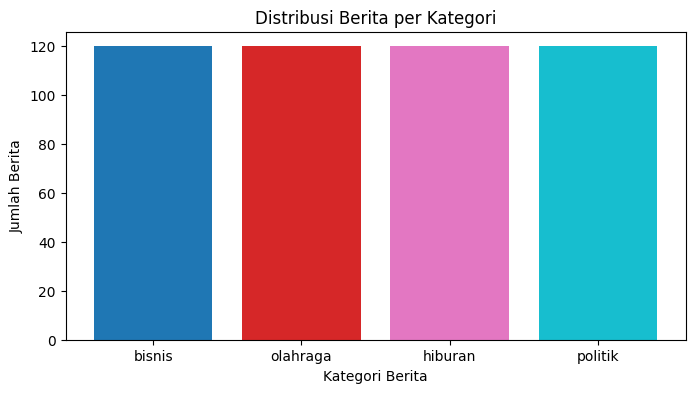

In [ ]:
count_per_cat = df_news_clean['Label'].value_counts()
colors = plt.cm.get_cmap('tab10', len(count_per_cat))

plt.figure(figsize = (8, 4))
plt.bar(count_per_cat.index, height = count_per_cat.values, color = colors(np.arange(len(count_per_cat))))
plt.xlabel('Kategori Berita')
plt.ylabel('Jumlah Berita')
plt.title('Distribusi Berita per Kategori')
plt.show()

Dari plot histogram di atas, terlihat bahwa berita dari masing-masing kategori memiliki jumlah yang sama atau balanced.

## Pie Chart Distribusi Berita berdasarkan Portal Media

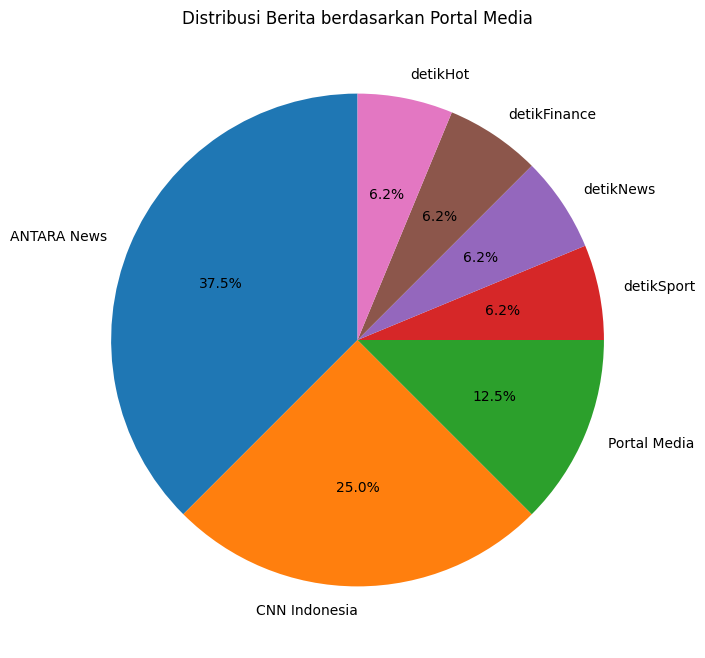

In [ ]:
count_per_media = df_news['Media'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(count_per_media, labels = count_per_media.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Distribusi Berita berdasarkan Portal Media')
plt.show()

Dari plot piechart di atas, terlihat bahwa ANTARA News memiliki persentase jumlah berita terbanyak, yaitu sebesar 37.5%. Kemudian disusul sebesar 25% berita berasal dari media CNN Indonesia, 12.5% berita berasal dari Portal Media, dan 6.2% berita berasal dari media detikHot, detikFinance, detikNews, dan detikSport.

## Bar Chart Top 10 Kata Paling Sering Muncul

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


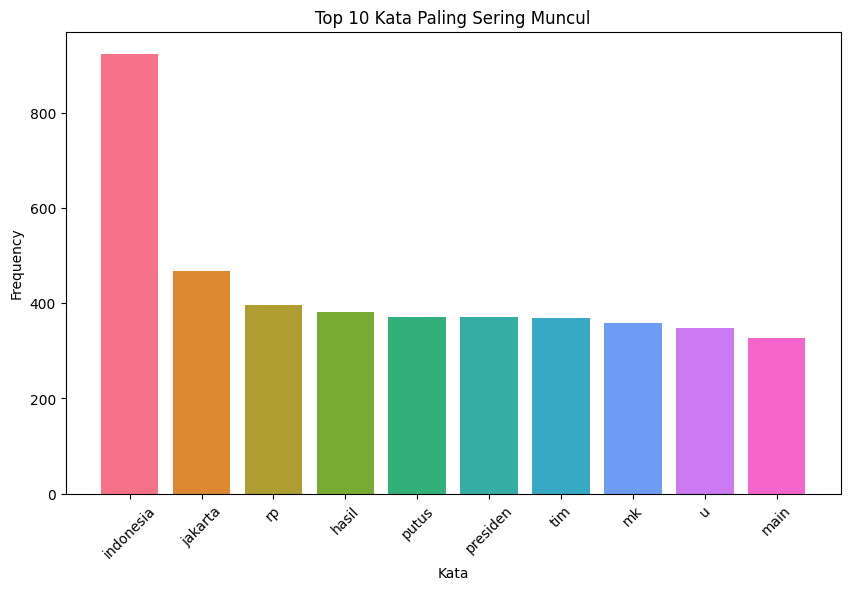

In [ ]:
import nltk
nltk.download('punkt')

token = ''.join([''.join(tokens) for tokens in df_news_clean['Tokens']])
token = token.replace("'", "")
token = token.replace(",", "")
token = token.replace("[", "")
token = token.replace("]", "")

from nltk.tokenize import word_tokenize
from collections import Counter

tokens = word_tokenize(token)
token_freq = Counter(tokens)
top_10_token = token_freq.most_common(10)
colors = sns.color_palette('husl', 10)

plt.figure(figsize=(10, 6))
plt.bar([token[0] for token in top_10_token], [token[1] for token in top_10_token], color = colors)
plt.xlabel('Kata')
plt.ylabel('Frequency')
plt.title('Top 10 Kata Paling Sering Muncul')
plt.xticks(rotation=45)
plt.show()

Dari plot bar chart di atas, terlihat bahwa "Indonesia" merupakan kata yang paling sering muncul dengan jumlah frekuensi di atas 800.

## WordCloud untuk Kategori Berita Politik

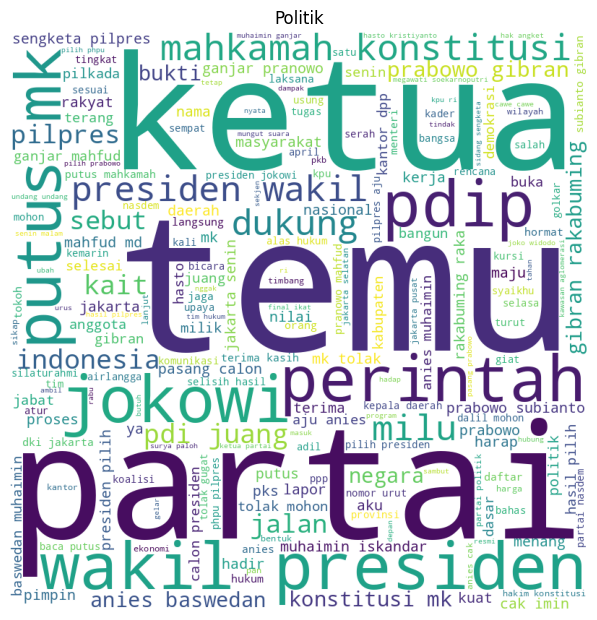

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

texts_per_label = {}
for label in df_news_clean['Label'].unique():
    texts_per_label[label] = ''.join([''.join(tokens) for tokens in df_news_clean[df_news_clean['Label'] == label]['Tokens']])
    texts_per_label[label] = texts_per_label[label].replace("'", "")

wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = None,
                    min_font_size = 10).generate(texts_per_label['politik'])

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title(f"Politik")
plt.tight_layout(pad = 0)

plt.show()

Dari plot word cloud di atas, terlihat bahwa kata yang paling sering muncul pada berita kategori politik adalah "Partai", "temu", "Ketua", "Jokowi", "wakil", dan "presiden".

## WordCloud untuk Kategori Berita Bisnis

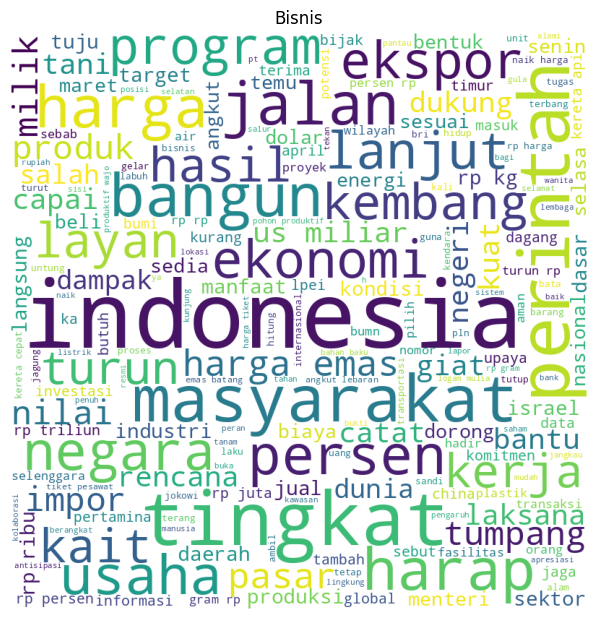

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = None,
                    min_font_size = 10).generate(texts_per_label['bisnis'])

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title(f"Bisnis")
plt.tight_layout(pad = 0)

plt.show()

Dari plot word cloud di atas, terlihat bahwa kata yang paling sering muncul pada berita kategori bisnis adalah "Indonesia", "harga", "tingkat", "prigram", "usaha", "ekspor", dan lainnya.

## WordCloud untuk Kategori Berita Olahraga

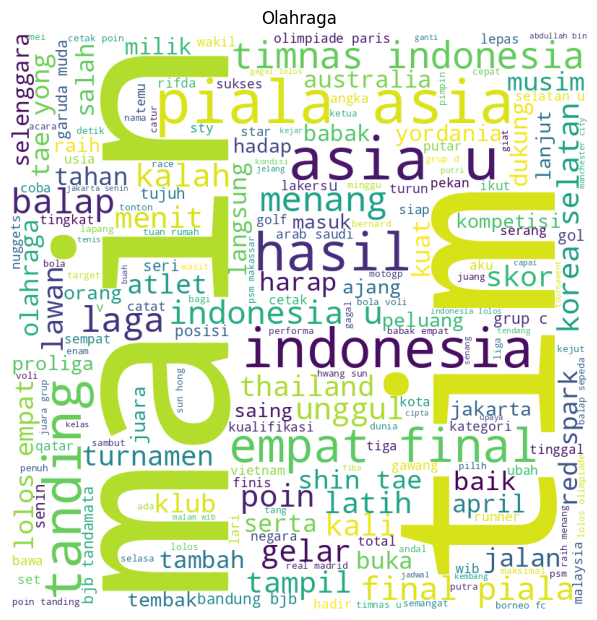

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = None,
                    min_font_size = 10).generate(texts_per_label['olahraga'])

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title(f"Olahraga")
plt.tight_layout(pad = 0)

plt.show()

Dari plot word cloud di atas, terlihat bahwa kata yang paling sering muncul pada berita kategori olahraga adalah "main", "tim", "Indonesia", "tanding".

## WordCloud untuk Kategori Berita Hiburan

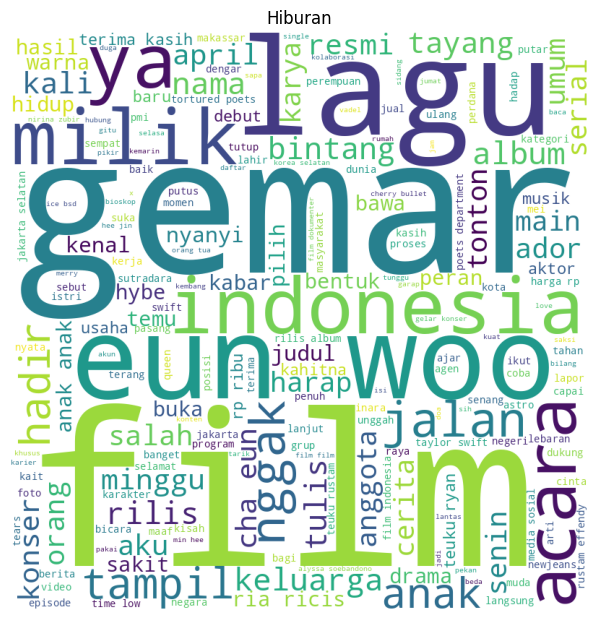

In [ ]:
wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = None,
                    min_font_size = 10).generate(texts_per_label['hiburan'])

plt.figure(figsize = (6, 6), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.title(f"Hiburan")
plt.tight_layout(pad = 0)

plt.show()

Dari plot word cloud di atas, terlihat bahwa kata yang paling sering muncul pada berita kategori hiburan adalah "gemar", "lagu", "film", "eunwoo".

# #4: Text Representation menggunakan TF-IDF dan Word2Vec

In [ ]:
# Mengimpor hasil text processing
df_news_clean = pd.read_excel("News Tokens.xlsx")
df_news_clean

,Teks,Clean Teks,Media,Label,Tokens
0,PT Kereta Api Indonesia alias KAI mencatat jum...,pt kereta api indonesia alias kai mencatat jum...,CNN Indonesia,bisnis,"['pt', 'kereta', 'api', 'indonesia', 'alias', ..."
1,Ada peluang untuk Sean Gelael dan Team WRT 31 ...,ada peluang untuk sean gelael dan team wrt fin...,detikSport,olahraga,"['peluang', 'sean', 'gelael', 'team', 'wrt', '..."
2,Cilegon mempunyai salah satu lapangan golf ter...,cilegon mempunyai salah satu lapangan golf ter...,detikSport,olahraga,"['cilegon', 'salah', 'lapang', 'golf', 'baik',..."
3,Kementerian Pekerjaan Umum dan Perumahan Rakya...,kementerian pekerjaan umum dan perumahan rakya...,ANTARA News,bisnis,"['menteri', 'kerja', 'rumah', 'rakyat', 'indon..."
4,Kopi Good Day DBL Camp 2024 siap digelar. Demi...,kopi good day dbl camp siap digelar demi berpa...,detikSport,olahraga,"['kopi', 'good', 'day', 'dbl', 'camp', 'gelar'..."
...,...,...,...,...,...
475,Alyssa Soebandono dan Dude Harlino menyambut k...,alyssa soebandono dan dude harlino menyambut k...,CNN Indonesia,hiburan,"['alyssa', 'soebandono', 'dude', 'harlino', 's..."
476,Perum Perhutani menggandeng PT Pabrik Gula Raj...,perum perhutani menggandeng pt pabrik gula raj...,ANTARA News,bisnis,"['perum', 'hutan', 'gandeng', 'pt', 'pabrik', ..."
477,Penyanyi dan aktor asal Korea Selatan Cha Eun-...,penyanyi dan aktor asal korea selatan cha eun ...,ANTARA News,hiburan,"['nyanyi', 'aktor', 'korea', 'selatan', 'cha',..."
478,Harga bawang merah meroket tajam tembus Rp 80....,harga bawang merah meroket tajam tembus rp per...,detikFinance,bisnis,"['harga', 'bawang', 'merah', 'roket', 'tajam',..."


In [ ]:
# Melakukan splitting data training dan data testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_news_clean['Tokens'], df_news_clean['Label'], test_size = 0.2, random_state = 42)

In [ ]:
print("x train size: ", x_train.size)
print("x test size: ", x_test.size)
print("y train size: ", y_train.size)
print("y test size: ", y_test.size)

x train size:  384
x test size:  96
y train size:  384
y test size:  96


Sebelum masuk ke text representation, saya membagi data menjadi 80% data training dan 20% data testing.

## Melakukan text representation dengan TF-IDF

Untuk melakukan text representasi dengan TF-IDF, langkah pertama adalah menginisialisasi TF-IDF Vectorizer. Setelah menginisialisasi, teks yang sebelumnya telah dipreprocess dan displit ke dalam bentuk token akan diberikan sebagai input yang akan ditransform untuk menghitung TF-IDF. TF-IDF akan memberikan bobot pada kata-kata yang sering muncul dalam sebuah teks tetapi jarang muncul di teks lain. Untuk nilai TF, semakin sering sebuah kata muncul, maka akan semakin tinggi nilainya. Untuk nilai IDF, semakin sering sebuah kata muncul, maka akan semakin rendah nilainya.

In [ ]:
# Untuk melakukan teks representation dengan TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_data = tfidf.fit_transform(df_news_clean['Tokens'])

In [ ]:
# Untuk melihat matriks dari TF-IDF
tf_idf_matrix = pd.DataFrame(tfidf_data.toarray(), columns = tfidf.get_feature_names_out())
tf_idf_matrix

,aa,aaam,aam,aang,aaron,aau,aba,abadi,abai,abang,...,zoo,zubac,zubir,zudan,zul,zulfahmi,zulfati,zulhas,zulkifli,zwxoduhed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.097426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
476,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044084,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Melakukan text representation dengan Word2Vec

Untuk teks representation metode kedua yang merepresentasi kata ke dalam suatu set vektor yang menggambarkan penggunaannya dalam konteks, saya menggunakan metode Word2Vec. Untuk melakukan text representation dengan Word2Vec, saya perlu mengubah data token saya yang tadinya merupakan string token menjadi sebuah list. Setelah itu, baru saya menginisialisasi object Word2Vec dengan parameter vector_size = 50 dan min_count 3 untuk membuat model dengan size vector 50 dan frequency kata yang diperhitungkan minimal 3. Karena di soal disebutkan bahwa vector yang dihasilkan harus berdasarkan hasil training dengan input kata dan target output konteks, maka saya menggunakan Word2Vec Skip-Gram dengan parameter sg = 1. Word2Vec akan mengukur similarity makna antara dua kata berdasarkan representasi vektornya. Semakin tinggi kesamaan makna atau konteks antara dua kata, maka nilai similarity yang dihasilkan semakin besar.

In [ ]:
# Mengubah list token yang semula class string menjadi list
data_w2v = df_news_clean['Tokens'].apply(lambda x: x.split())
data_w2v = data_w2v.apply(lambda x: [word.replace("'", "").replace(",", "") for word in x])

In [ ]:
# Untuk melakukan teks representation dengan Word2Vec
from gensim.models import Word2Vec

w2v = Word2Vec(data_w2v, vector_size = 50, min_count = 3, sg = 1)

In [ ]:
# Untuk melihat vektor Word2Vec
w2v_vector = w2v.wv.index_to_key
w2v_vector

['indonesia',
 'jakarta',
 'rp',
 'hasil',
 'putus',
 'presiden',
 'tim',
 'mk',
 'u',
 'main',
 'harga',
 'jalan',
 'senin',
 'perintah',
 'pilih',
 'prabowo',
 'temu',
 'pilpres',
 'anak',
 'persen',
 'asia',
 'milik',
 'film',
 'harap',
 'menang',
 'salah',
 'negara',
 'gelar',
 'tingkat',
 'dukung',
 'terima',
 'poin',
 'gibran',
 'tanding',
 'masyarakat',
 'anies',
 'april',
 'wakil',
 'nilai',
 'partai',
 'kerja',
 'ketua',
 'selatan',
 'kait',
 'kota',
 'lagu',
 'piala',
 'final',
 'jokowi',
 'mohon',
 'ekonomi',
 'kali',
 'turun',
 'grup',
 'bangun',
 'daerah',
 'ya',
 'empat',
 'lanjut',
 'timnas',
 'milu',
 'usaha',
 'lolos',
 'juang',
 'tampil',
 'hukum',
 'kuat',
 'posisi',
 'hadir',
 'orang',
 'selasa',
 'terang',
 'nama',
 'buka',
 'korea',
 'laga',
 'resmi',
 'menteri',
 'latih',
 'rumah',
 'juta',
 'langsung',
 'nomor',
 'nasional',
 'tahan',
 'kalah',
 'balap',
 'program',
 'calon',
 'sebut',
 'babak',
 'dunia',
 'gemar',
 'pasang',
 'pdip',
 'pusat',
 'lawan',
 'tiket

# #5: Pemodelan Klasifikasi menggunakan SVM dan Random Forest

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Melakukan encoding pada label
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

print("Classes:", encoder.classes_)

Classes: ['bisnis' 'hiburan' 'olahraga' 'politik']


Sebelum melakukan pemodelan, saya melakukan label encoder untuk mengubah label kategori berita ke dalam bentuk numerik menggunakan LabelEncoder().

In [ ]:
# Untuk mengembalikan label coded ke semula
def decode_label(encoded_labels):
    classes = ['bisnis', 'hiburan', 'olahraga', 'politik']
    decoded_labels = []
    for encoded_label in encoded_labels:
        if encoded_label == 0:
            decoded_labels.append(classes[0])
        elif encoded_label == 1:
            decoded_labels.append(classes[1])
        elif encoded_label == 2:
            decoded_labels.append(classes[2])
        elif encoded_label == 3:
            decoded_labels.append(classes[3])
        else:
            decoded_labels.append(None)
    return decoded_labels

Untuk memudahkan dalam melihat hasil prediksi nantinya, saya menyediakan function untuk mengubah label encoded ke dalam bentuk aslinya.

## TF-IDF SVM

### Melakukan klasifikasi menggunakan text representation TF-IDF dan SVM

In [ ]:
# Melakkukan transfrom x_train dan x_test ke vektor TF-IDF
train_x_tfidf = tfidf.transform(x_train)
test_x_tfidf = tfidf.transform(x_test)

In [ ]:
from sklearn.svm import SVC

svm_model_tf1 = SVC(gamma = 'scale', C = 1, degree = 3)
svm_model_tf1.fit(train_x_tfidf, y_train)
svm_pred_tf1 = svm_model_tf1.predict(test_x_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred_tf1))
print("")
print("Classification Report:")
print(classification_report(y_test, svm_pred_tf1))

Confusion Matrix:
[[25  0  0  1]
 [ 0 20  0  1]
 [ 0  0 27  0]
 [ 2  2  0 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       0.91      0.95      0.93        21
           2       1.00      1.00      1.00        27
           3       0.90      0.82      0.86        22

    accuracy                           0.94        96
   macro avg       0.93      0.93      0.93        96
weighted avg       0.94      0.94      0.94        96



Dari classification report, terlihat hasil accuracy yang diperoleh secara keseluruhan dalam memprediksi menggunakan model SVM pertama dari metode TF-IDF yang sebelumnya telah ditraining cukup tinggi, yaitu 94%.
1.   Kategori Bisnis  ->
Kategori ini memiliki precision score sebesar 93%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori bisnis, 93% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 96%, yang artinya model berhasil memprediksi benar sebesar 96% dari semua teks/token dari kategori bisnis. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 94%.
2.   Kategori Hiburan ->
Kategori ini memiliki precision score sebesar 91%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori hiburan, 91% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 95%, yang artinya model berhasil memprediksi benar sebesar 95% dari semua teks/token dari kategori hiburan. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 93%.
3.  Kategori Olahraga ->
Kategori ini memiliki precision score sebesar 100%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori olahraga, 100% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 100%, yang artinya model berhasil memprediksi benar sebesar 100% dari semua teks/token dari kategori olahraga. Model ini juga memiliki f1-score yang sangat tinggi, yaitu sebesar 100%.
4.  Kategori Politik ->
Kategori ini memiliki precision score sebesar 90%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori politik, 90% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 82%, yang artinya model berhasil memprediksi benar sebesar 82% dari semua teks/token dari kategori politik. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 86%.

### Melakukan hyperparameter tuning untuk TF-IDF dan SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'degree': [2, 3, 4]
}

grid = GridSearchCV(SVC(), param_grid, cv = 5)
grid.fit(train_x_tfidf, y_train)

print(grid.best_params_)

{'C': 100, 'degree': 2, 'gamma': 0.1}


In [ ]:
from sklearn.svm import SVC

svm_model_tf2 = SVC(gamma = 0.1, C = 100, degree = 2)
svm_model_tf2.fit(train_x_tfidf, y_train)
svm_pred_tf2 = svm_model_tf2.predict(test_x_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred_tf2))
print("")
print("Classification Report:")
print(classification_report(y_test, svm_pred_tf2))

Confusion Matrix:
[[25  0  0  1]
 [ 0 20  0  1]
 [ 0  0 27  0]
 [ 2  1  0 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       0.95      0.95      0.95        21
           2       1.00      1.00      1.00        27
           3       0.90      0.86      0.88        22

    accuracy                           0.95        96
   macro avg       0.95      0.94      0.94        96
weighted avg       0.95      0.95      0.95        96



Dari classification report, terlihat hasil accuracy yang diperoleh secara keseluruhan dalam memprediksi menggunakan model SVM kedua dari metode TF-IDF yang sebelumnya telah ditraining cukup tinggi, yaitu 95%.
1.   Kategori Bisnis  ->
Kategori ini memiliki precision score sebesar 93%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori bisnis, 93% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 96%, yang artinya model berhasil memprediksi benar sebesar 96% dari semua teks/token dari kategori bisnis. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 94%.
2.   Kategori Hiburan ->
Kategori ini memiliki precision score sebesar 95%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori hiburan, 95% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 95%, yang artinya model berhasil memprediksi benar sebesar 95% dari semua teks/token dari kategori hiburan. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 95%.
3.  Kategori Olahraga ->
Kategori ini memiliki precision score sebesar 100%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori olahraga, 100% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 100%, yang artinya model berhasil memprediksi benar sebesar 100% dari semua teks/token dari kategori olahraga. Model ini juga memiliki f1-score yang sangat tinggi, yaitu sebesar 100%.
4.  Kategori Politik ->
Kategori ini memiliki precision score sebesar 90%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori politik, 90% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 86%, yang artinya model berhasil memprediksi benar sebesar 86% dari semua teks/token dari kategori politik. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 88%.

In [ ]:
# Melihat hasil prediksi
df_results = pd.DataFrame({'Text': x_test, 'Label Actual': decode_label(y_test), 'Label Predicted': decode_label(svm_pred_tf2)})
df_results

,Text,Label Actual,Label Predicted
73,"['tanding', 'sengit', 'saji', 'pekan', 'kompet...",olahraga,olahraga
414,"['md', 'pictures', 'umum', 'badarawuhi', 'desa...",hiburan,hiburan
394,"['latih', 'satria', 'muda', 'pena', 'garces', ...",olahraga,olahraga
277,"['alami', 'darah', 'otak', 'tukul', 'arwana', ...",hiburan,hiburan
399,"['jakarta', 'jacx', 'berita', 'unggul', 'kini'...",politik,politik
...,...,...,...
222,"['wakil', 'presiden', 'pilih', 'gibran', 'raka...",politik,politik
237,"['dosen', 'departemen', 'filsafat', 'fakultas'...",politik,politik
408,"['timnas', 'indonesia', 'u', 'hasil', 'penuh',...",olahraga,olahraga
25,"['ayah', 'teuku', 'ryan', 'teuku', 'rustam', '...",hiburan,hiburan


## TF-IDF Random Forest

### Melakukan klasifikasi menggunakan text representation TF-IDF dan Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model_tf1 = RandomForestClassifier(n_estimators = 100, max_depth = None)
rf_model_tf1.fit(train_x_tfidf, y_train)
rf_pred_tf1 = rf_model_tf1.predict(test_x_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred_tf1))
print("")
print("Classification Report:")
print(classification_report(y_test, rf_pred_tf1))

Confusion Matrix:
[[24  0  0  2]
 [ 1 19  0  1]
 [ 0  0 27  0]
 [ 1  2  0 19]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        26
           1       0.90      0.90      0.90        21
           2       1.00      1.00      1.00        27
           3       0.86      0.86      0.86        22

    accuracy                           0.93        96
   macro avg       0.92      0.92      0.92        96
weighted avg       0.93      0.93      0.93        96



Dari classification report, terlihat hasil accuracy yang diperoleh secara keseluruhan dalam memprediksi menggunakan model Random Forest pertama dari metode TF-IDF yang sebelumnya telah ditraining cukup tinggi, yaitu 93%.
1.   Kategori Bisnis  ->
Kategori ini memiliki precision score sebesar 92%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori bisnis, 92% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 92%, yang artinya model berhasil memprediksi benar sebesar 92% dari semua teks/token dari kategori bisnis. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 92%.
2.   Kategori Hiburan ->
Kategori ini memiliki precision score sebesar 90%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori hiburan, 90% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 90%, yang artinya model berhasil memprediksi benar sebesar 90% dari semua teks/token dari kategori hiburan. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 90%.
3.  Kategori Olahraga ->
Kategori ini memiliki precision score sebesar 100%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori olahraga, 100% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 100%, yang artinya model berhasil memprediksi benar sebesar 100% dari semua teks/token dari kategori olahraga. Model ini juga memiliki f1-score yang sangat tinggi, yaitu sebesar 100%.
4.  Kategori Politik ->
Kategori ini memiliki precision score sebesar 86%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori politik, 86% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 86%, yang artinya model berhasil memprediksi benar sebesar 86% dari semua teks/token dari kategori politik. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 86%.

### Melakukan hyperparameter tuning untuk TF-IDF dan Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
grid.fit(train_x_tfidf, y_train)

print(grid.best_params_)

{'max_depth': 10, 'n_estimators': 50}


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model_tf2 = RandomForestClassifier(n_estimators = 50, max_depth = 10)
rf_model_tf2.fit(train_x_tfidf, y_train)
rf_pred_tf2 = rf_model_tf2.predict(test_x_tfidf)

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred_tf2))
print("")
print("Classification Report:")
print(classification_report(y_test, rf_pred_tf2))

Confusion Matrix:
[[25  0  0  1]
 [ 0 20  0  1]
 [ 0  0 27  0]
 [ 2  2  0 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       0.91      0.95      0.93        21
           2       1.00      1.00      1.00        27
           3       0.90      0.82      0.86        22

    accuracy                           0.94        96
   macro avg       0.93      0.93      0.93        96
weighted avg       0.94      0.94      0.94        96



Dari classification report, terlihat hasil accuracy yang diperoleh secara keseluruhan dalam memprediksi menggunakan model Random Forest kedua dari metode TF-IDF yang sebelumnya telah ditraining cukup tinggi, yaitu 94%.
1.   Kategori Bisnis  ->
Kategori ini memiliki precision score sebesar 93%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori bisnis, 93% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 96%, yang artinya model berhasil memprediksi benar sebesar 96% dari semua teks/token dari kategori bisnis. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 94%.
2.   Kategori Hiburan ->
Kategori ini memiliki precision score sebesar 91%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori hiburan, 91% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 95%, yang artinya model berhasil memprediksi benar sebesar 95% dari semua teks/token dari kategori hiburan. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 93%.
3.  Kategori Olahraga ->
Kategori ini memiliki precision score sebesar 100%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori olahraga, 100% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 100%, yang artinya model berhasil memprediksi benar sebesar 100% dari semua teks/token dari kategori olahraga. Model ini juga memiliki f1-score yang sangat tinggi, yaitu sebesar 100%.
4.  Kategori Politik ->
Kategori ini memiliki precision score sebesar 90%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori politik, 90% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 82%, yang artinya model berhasil memprediksi benar sebesar 82% dari semua teks/token dari kategori politik. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 86%.

In [ ]:
# Melihat hasil prediksi
df_results = pd.DataFrame({'Text': x_test, 'Label Actual': decode_label(y_test), 'Label Predicted': decode_label(rf_pred_tf2)})
df_results

,Text,Label Actual,Label Predicted
73,"['tanding', 'sengit', 'saji', 'pekan', 'kompet...",olahraga,olahraga
414,"['md', 'pictures', 'umum', 'badarawuhi', 'desa...",hiburan,hiburan
394,"['latih', 'satria', 'muda', 'pena', 'garces', ...",olahraga,olahraga
277,"['alami', 'darah', 'otak', 'tukul', 'arwana', ...",hiburan,hiburan
399,"['jakarta', 'jacx', 'berita', 'unggul', 'kini'...",politik,politik
...,...,...,...
222,"['wakil', 'presiden', 'pilih', 'gibran', 'raka...",politik,politik
237,"['dosen', 'departemen', 'filsafat', 'fakultas'...",politik,politik
408,"['timnas', 'indonesia', 'u', 'hasil', 'penuh',...",olahraga,olahraga
25,"['ayah', 'teuku', 'ryan', 'teuku', 'rustam', '...",hiburan,hiburan


## Word2Vec - SVM

In [ ]:
# Mengubah list token yang semula class string menjadi list
w2v_train = x_train.apply(lambda x: x.split())
w2v_train = w2v_train.apply(lambda x: [word.replace("'", "").replace(",", "") for word in x])

w2v_test = x_test.apply(lambda x: x.split())
w2v_test = w2v_test.apply(lambda x: [word.replace("'", "").replace(",", "") for word in x])

In [ ]:
# Untuk melakukan teks representation dengan Word2Vec
from gensim.models import Word2Vec

w2v = Word2Vec(w2v_train, vector_size = 50, min_count = 3, sg = 1)

In [ ]:
# Untuk mengubah data training dan testing ke vektor Word2Vec
train_x_w2v = np.array([np.mean([w2v.wv[word] for word in words if word in w2v.wv] or [np.zeros(50)], axis = 0) for words in w2v_train])
test_x_w2v = np.array([np.mean([w2v.wv[word] for word in words if word in w2v.wv] or [np.zeros(50)], axis = 0) for words in w2v_test])

### Melakukan klasifikasi menggunakan text representation Word2Vec dan SVM

In [ ]:
from sklearn.svm import SVC

svm_model_w2v1 = SVC(gamma = 'scale', C = 1, degree = 3)
svm_model_w2v1.fit(train_x_w2v, y_train)
svm_pred_w2v = svm_model_w2v1.predict(test_x_w2v)

print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred_w2v))
print("")
print("Classification Report:")
print(classification_report(y_test, svm_pred_w2v))

Confusion Matrix:
[[23  1  0  2]
 [ 0 20  0  1]
 [ 0  0 27  0]
 [ 1  2  1 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.87      0.95      0.91        21
           2       0.96      1.00      0.98        27
           3       0.86      0.82      0.84        22

    accuracy                           0.92        96
   macro avg       0.91      0.91      0.91        96
weighted avg       0.92      0.92      0.92        96



Dari classification report, terlihat hasil accuracy yang diperoleh secara keseluruhan dalam memprediksi menggunakan model SVM pertama dari metode Word2Vec yang sebelumnya telah ditraining cukup tinggi, yaitu 92%.
1.   Kategori Bisnis  ->
Kategori ini memiliki precision score sebesar 96%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori bisnis, 96% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 88%, yang artinya model berhasil memprediksi benar sebesar 88% dari semua teks/token dari kategori bisnis. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 92%.
2.   Kategori Hiburan ->
Kategori ini memiliki precision score sebesar 87%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori hiburan, 87% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 95%, yang artinya model berhasil memprediksi benar sebesar 95% dari semua teks/token dari kategori hiburan. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 91%.
3.  Kategori Olahraga ->
Kategori ini memiliki precision score sebesar 96%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori olahraga, 96% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 100%, yang artinya model berhasil memprediksi benar sebesar 100% dari semua teks/token dari kategori olahraga. Model ini juga memiliki f1-score yang sangat tinggi, yaitu sebesar 98%.
4.  Kategori Politik ->
Kategori ini memiliki precision score sebesar 86%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori politik, 86% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 82%, yang artinya model berhasil memprediksi benar sebesar 82% dari semua teks/token dari kategori politik. Model ini juga memiliki f1-score yang cukup tinggi, yaitu sebesar 84%.

### Melakukan hyperparameter tuning untuk Word2Vec dan SVM

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 1000],
    'gamma': [0.001, 0.01, 0.1, 1, 10],
    'degree': [2, 3, 4]
}

grid = GridSearchCV(SVC(), param_grid, cv = 5)
grid.fit(train_x_w2v, y_train)

print(grid.best_params_)

{'C': 1000, 'degree': 2, 'gamma': 0.1}


In [ ]:
from sklearn.svm import SVC

svm_model_w2v2 = SVC(gamma = 0.1, C = 1000, degree = 2)
svm_model_w2v2.fit(train_x_w2v, y_train)
svm_pred_w2v2 = svm_model_w2v2.predict(test_x_w2v)

print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred_w2v2))
print("")
print("Classification Report:")
print(classification_report(y_test, svm_pred_w2v2))

Confusion Matrix:
[[25  0  0  1]
 [ 0 20  0  1]
 [ 0  1 26  0]
 [ 2  2  0 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        26
           1       0.87      0.95      0.91        21
           2       1.00      0.96      0.98        27
           3       0.90      0.82      0.86        22

    accuracy                           0.93        96
   macro avg       0.92      0.92      0.92        96
weighted avg       0.93      0.93      0.93        96



Dari classification report, terlihat hasil accuracy yang diperoleh secara keseluruhan dalam memprediksi menggunakan model SVM kedua dari metode Word2Vec yang sebelumnya telah ditraining cukup tinggi, yaitu 93%.
1.   Kategori Bisnis  ->
Kategori ini memiliki precision score sebesar 93%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori bisnis, 93% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 96%, yang artinya model berhasil memprediksi benar sebesar 96% dari semua teks/token dari kategori bisnis. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 94%.
2.   Kategori Hiburan ->
Kategori ini memiliki precision score sebesar 87%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori hiburan, 87% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 95%, yang artinya model berhasil memprediksi benar sebesar 95% dari semua teks/token dari kategori hiburan. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 91%.
3.  Kategori Olahraga ->
Kategori ini memiliki precision score sebesar 100%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori olahraga, 100% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 96%, yang artinya model berhasil memprediksi benar sebesar 96% dari semua teks/token dari kategori olahraga. Model ini juga memiliki f1-score yang sangat tinggi, yaitu sebesar 98%.
4.  Kategori Politik ->
Kategori ini memiliki precision score sebesar 90%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori politik, 90% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 82%, yang artinya model berhasil memprediksi benar sebesar 82% dari semua teks/token dari kategori politik. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 86%.

In [ ]:
# Melihat hasil prediksi
df_results = pd.DataFrame({'Text': x_test, 'Label Actual': decode_label(y_test), 'Label Predicted': decode_label(svm_pred_w2v2)})
df_results

,Text,Label Actual,Label Predicted
73,"['tanding', 'sengit', 'saji', 'pekan', 'kompet...",olahraga,olahraga
414,"['md', 'pictures', 'umum', 'badarawuhi', 'desa...",hiburan,hiburan
394,"['latih', 'satria', 'muda', 'pena', 'garces', ...",olahraga,olahraga
277,"['alami', 'darah', 'otak', 'tukul', 'arwana', ...",hiburan,hiburan
399,"['jakarta', 'jacx', 'berita', 'unggul', 'kini'...",politik,hiburan
...,...,...,...
222,"['wakil', 'presiden', 'pilih', 'gibran', 'raka...",politik,politik
237,"['dosen', 'departemen', 'filsafat', 'fakultas'...",politik,politik
408,"['timnas', 'indonesia', 'u', 'hasil', 'penuh',...",olahraga,olahraga
25,"['ayah', 'teuku', 'ryan', 'teuku', 'rustam', '...",hiburan,hiburan


## Word2Vec - Random Forest

### Melakukan klasifikasi menggunakan text representation Word2Vec dan Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model_w2v1 = RandomForestClassifier(n_estimators = 100, max_depth = None)
rf_model_w2v1.fit(train_x_w2v, y_train)
rf_pred_w2v1 = rf_model_w2v1.predict(test_x_w2v)

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred_w2v1))
print("")
print("Classification Report:")
print(classification_report(y_test, rf_pred_w2v1))

Confusion Matrix:
[[22  1  0  3]
 [ 0 20  0  1]
 [ 0  0 27  0]
 [ 1  2  1 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.85      0.90        26
           1       0.87      0.95      0.91        21
           2       0.96      1.00      0.98        27
           3       0.82      0.82      0.82        22

    accuracy                           0.91        96
   macro avg       0.90      0.90      0.90        96
weighted avg       0.91      0.91      0.91        96



Dari classification report, terlihat hasil accuracy yang diperoleh secara keseluruhan dalam memprediksi menggunakan model Random Forest pertama dari metode Word2Vec yang sebelumnya telah ditraining cukup tinggi, yaitu 91%.
1.   Kategori Bisnis  ->
Kategori ini memiliki precision score sebesar 96%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori bisnis, 96% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 85%, yang artinya model berhasil memprediksi benar sebesar 85% dari semua teks/token dari kategori bisnis. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 90%.
2.   Kategori Hiburan ->
Kategori ini memiliki precision score sebesar 87%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori hiburan, 87% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 95%, yang artinya model berhasil memprediksi benar sebesar 95% dari semua teks/token dari kategori hiburan. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 91%.
3.  Kategori Olahraga ->
Kategori ini memiliki precision score sebesar 96%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori olahraga, 96% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 100%, yang artinya model berhasil memprediksi benar sebesar 100% dari semua teks/token dari kategori olahraga. Model ini juga memiliki f1-score yang sangat tinggi, yaitu sebesar 98%.
4.  Kategori Politik ->
Kategori ini memiliki precision score sebesar 82%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori politik, 82% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 82%, yang artinya model berhasil memprediksi benar sebesar 82% dari semua teks/token dari kategori politik. Model ini juga memiliki f1-score yang cukup tinggi, yaitu sebesar 82%.

### Melakukan hyperparameter tuning untuk Word2Vec dan Random Forest

---



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None],
    'n_jobs': [0, 1, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5)
grid.fit(train_x_w2v, y_train)

print(grid.best_params_)

{'max_depth': None, 'n_estimators': 50, 'n_jobs': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 473, in fit
    trees = Parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/job

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model_w2v2 = RandomForestClassifier(n_estimators = 50, n_jobs = 10, max_depth = None)
rf_model_w2v2.fit(train_x_w2v, y_train)
rf_pred_w2v2 = rf_model_w2v2.predict(test_x_w2v)

print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred_w2v2))
print("")
print("Classification Report:")
print(classification_report(y_test, rf_pred_w2v2))

Confusion Matrix:
[[23  1  0  2]
 [ 0 20  0  1]
 [ 0  0 27  0]
 [ 1  2  1 18]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92        26
           1       0.87      0.95      0.91        21
           2       0.96      1.00      0.98        27
           3       0.86      0.82      0.84        22

    accuracy                           0.92        96
   macro avg       0.91      0.91      0.91        96
weighted avg       0.92      0.92      0.92        96



Dari classification report, terlihat hasil accuracy yang diperoleh secara keseluruhan dalam memprediksi menggunakan model Random Forest kedua dari metode Word2Vec yang sebelumnya telah ditraining cukup tinggi, yaitu 92%.
1.   Kategori Bisnis  ->
Kategori ini memiliki precision score sebesar 96%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori bisnis, 96% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 88%, yang artinya model berhasil memprediksi benar sebesar 88% dari semua teks/token dari kategori bisnis. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 92%.
2.   Kategori Hiburan ->
Kategori ini memiliki precision score sebesar 87%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori hiburan, 87% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 95%, yang artinya model berhasil memprediksi benar sebesar 95% dari semua teks/token dari kategori hiburan. Model ini juga memiliki f1-score yang lumayan tinggi, yaitu sebesar 91%.
3.  Kategori Olahraga ->
Kategori ini memiliki precision score sebesar 96%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori olahraga, 96% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 100%, yang artinya model berhasil memprediksi benar sebesar 100% dari semua teks/token dari kategori olahraga. Model ini juga memiliki f1-score yang sangat tinggi, yaitu sebesar 98%.
4.  Kategori Politik ->
Kategori ini memiliki precision score sebesar 86%, yang artinya dari seluruh teks/token yang diprediksi merupakan kategori politik, 86% di antaranya adalah benar. Lalu, kategori ini memiliki recall score sebesar 82%, yang artinya model berhasil memprediksi benar sebesar 82% dari semua teks/token dari kategori politik. Model ini juga memiliki f1-score yang cukup tinggi, yaitu sebesar 84%.

In [ ]:
# Melihat hasil prediksi
df_results = pd.DataFrame({'Text': x_test, 'Label Actual': decode_label(y_test), 'Label Predicted': decode_label(rf_pred_w2v2)})
df_results

,Text,Label Actual,Label Predicted
73,"['tanding', 'sengit', 'saji', 'pekan', 'kompet...",olahraga,olahraga
414,"['md', 'pictures', 'umum', 'badarawuhi', 'desa...",hiburan,hiburan
394,"['latih', 'satria', 'muda', 'pena', 'garces', ...",olahraga,olahraga
277,"['alami', 'darah', 'otak', 'tukul', 'arwana', ...",hiburan,hiburan
399,"['jakarta', 'jacx', 'berita', 'unggul', 'kini'...",politik,olahraga
...,...,...,...
222,"['wakil', 'presiden', 'pilih', 'gibran', 'raka...",politik,politik
237,"['dosen', 'departemen', 'filsafat', 'fakultas'...",politik,politik
408,"['timnas', 'indonesia', 'u', 'hasil', 'penuh',...",olahraga,olahraga
25,"['ayah', 'teuku', 'ryan', 'teuku', 'rustam', '...",hiburan,hiburan


## Comparison Score

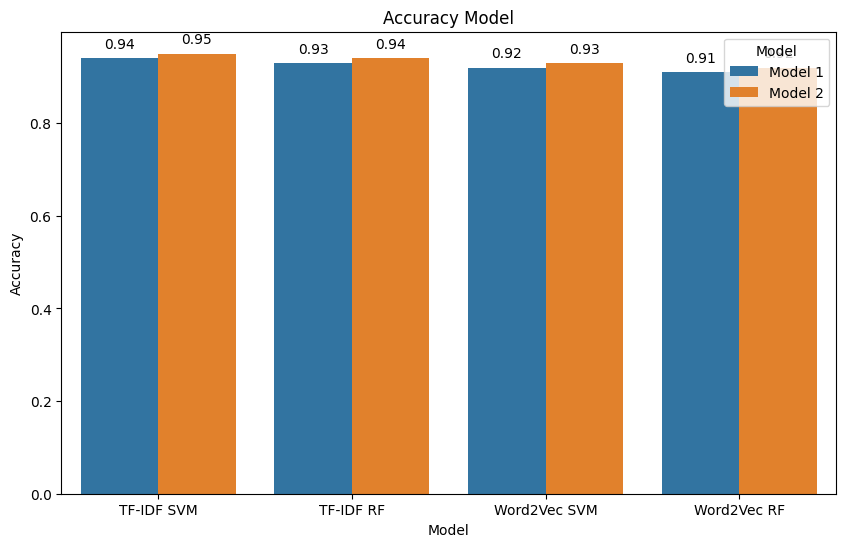

In [ ]:
# Untuk menampilkan plot perbandingan akurasi antara model

data = {
    'Model': ['TF-IDF SVM', 'TF-IDF RF', 'Word2Vec SVM', 'Word2Vec RF'],
    'Model 1': [0.94, 0.93, 0.92, 0.91],
    'Model 2': [0.95, 0.94, 0.93, 0.92]
}
df = pd.DataFrame(data)

plt.figure(figsize = (10, 6))
ax = sns.barplot(x = 'Model', y = 'value', hue = 'variable', data = pd.melt(df, ['Model']))

for p in ax.patches:
    height = p.get_height()
    if height > 0.005:
        ax.annotate('{:.2f}'.format(height),
                    (p.get_x() + p.get_width() / 2., height),
                    ha = 'center', va = 'center', xytext=(0, 10),
                    textcoords = 'offset points')

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Model')
plt.legend(title = 'Model', loc = 'best')

plt.show()

Dari tabel di atas, dapat dilihat bahwa di antara seluruh metode, nilai accuracy tertinggi diperoleh menggunakan metode TF-IDF dengan algoritma SVM yakni sebesar 95%. Selain itu, seluruh model dari masing-masing metode dan algoritma mengalami peningkatan performa setelah dilakukan hyperparameter tuning.

Untuk metode text representation, metode TF-IDF memberikan performa yang lebih baik daripada Word2Vec, baik untuk algoritma SVM maupun Random Forest. Sementara itu, untuk algoritma, SVM cenderung memberikan performa yang lebih baik daripada Random Forest untuk kedua metode text representation.

Meskipun demikian, pada kasus ini kedua metode text representation memberikan hasil yang serupa sehingga pemilihan metode text representation dapat mempertimbangkan beberapa faktor lain, seperti jumlah data, kompleksitas data, dan lainnya.